# Knowledge-exploration
## Participants based analysis

In [1]:
import numpy as np
import pandas as pd

## call the embeddings

In [181]:
# question 1 embedding from distilbert model
emb_1 = pd.read_json('~/thesis/embeddings/knowledge_openai_question1.jsonl', orient='records', lines = True)

In [182]:
# question 2 embedding from distilbert model
emb_2 = pd.read_json('~/thesis/embeddings/knowledge_openai_question2.jsonl', orient='records', lines = True)

In [183]:
# question 3 embedding from distilbert model
emb_3 = pd.read_json('~/thesis/embeddings/knowledge_openai_question3.jsonl', orient='records', lines = True)

In [184]:
# question 4 embedding from distilbert model
emb_4 = pd.read_json('~/thesis/embeddings/knowledge_openai_question4.jsonl', orient='records', lines = True)

In [185]:
# question 5 embedding from distilbert model
emb_5 = pd.read_json('~/thesis/embeddings/knowledge_openai_question5.jsonl', orient='records', lines = True)

### Aggregate within the dataframe first and then join together

In [186]:
emb_1.head(5)

,index,q1
0,00278,"[-0.0294491792, -0.047710513100000004, 0.21808..."
1,0068d,"[0.018888133300000002, -0.0616387874, 0.171511..."
2,00f13,"[0.0328847421, -0.0337260091, 0.20334434880000..."
3,01cb6,"[-0.042097603000000004, -0.0094608217, 0.21692..."
4,02670,"[0.0103939993, -0.046226321300000005, 0.175308..."


In [187]:
# Group by 'index' and calculate the mean of 'q1_emb'
emb_1 = emb_1.groupby('index')['q1'].apply(lambda x: np.mean(np.stack(x), axis=0))
emb_1 = pd.DataFrame(emb_1, columns= ['q1'])
emb_1['index'] = emb_1.index
emb_1 = emb_1.reset_index(drop = True)

In [188]:
emb_1

,q1,index
0,"[-0.0294491792, -0.047710513100000004, 0.21808...",00278
1,"[0.018888133300000002, -0.0616387874, 0.171511...",0068d
2,"[0.0328847421, -0.0337260091, 0.20334434880000...",00f13
3,"[-0.042097603000000004, -0.0094608217, 0.21692...",01cb6
4,"[0.0103939993, -0.046226321300000005, 0.175308...",02670
...,...,...
293,"[0.0256816596, -0.011286425400000001, 0.160009...",f92a4
294,"[0.0003793323, -0.0353918606, 0.2978786118, 0....",f9fd8
295,"[0.0054284672, -0.068418537, 0.1615336072, 0.0...",fb2a2
296,"[-0.0032344566, -0.0503300964, 0.1609090846, 0...",fb9c4


In [189]:
# Group by 'index' and calculate the mean of 'q2_emb'
emb_2 = emb_2.groupby('index')['q2'].apply(lambda x: np.mean(np.stack(x), axis=0))
emb_2 = pd.DataFrame(emb_2, columns= ['q2'])
emb_2['index'] = emb_2.index
emb_2 = emb_2.reset_index(drop = True)

In [190]:
# Group by 'index' and calculate the mean of 'q3_emb'
emb_3 = emb_3.groupby('index')['q3'].apply(lambda x: np.mean(np.stack(x), axis=0))
emb_3 = pd.DataFrame(emb_3, columns= ['q3'])
emb_3['index'] = emb_3.index
emb_3 = emb_3.reset_index(drop = True)

In [191]:
# Group by 'index' and calculate the mean of 'q4_emb'
emb_4 = emb_4.groupby('index')['q4'].apply(lambda x: np.mean(np.stack(x), axis=0))
emb_4 = pd.DataFrame(emb_4, columns= ['q4'])
emb_4['index'] = emb_4.index
emb_4 = emb_4.reset_index(drop = True)

In [192]:
# Group by 'index' and calculate the mean of 'q5_emb'
emb_5 = emb_5.groupby('index')['q5'].apply(lambda x: np.mean(np.stack(x), axis=0))
emb_5 = pd.DataFrame(emb_5, columns= ['q5'])
emb_5['index'] = emb_5.index
emb_5 = emb_5.reset_index(drop = True)

In [193]:
# # check manually if the above code works.

# temp = df_1_whole[['PARTICIPANT_ID', 'emb_ideas']]
# print(temp[temp['PARTICIPANT_ID']== '00278']['emb_ideas'].to_list())
# instance = temp[temp['PARTICIPANT_ID']== '00278']['emb_ideas']

# sum = 0 
# for i in range(5): 
#     sum += instance[0][i][0]
# sum/5 # This should match with the first element of the emb_1['q1'][0]

## Demographic data calling

In [194]:
# call the original data again
df = pd.read_csv('~/knowledge-explore/data/processed_data/reference_dataset_v1.csv')

In [195]:
df.head(3)

,Unnamed: 0,problem_id,participant_id,DAT,CRT2,CURIOSITY_SCORE,AGE,GENDER,EDUCATION,EMPLOYMENT,...,POLITICAL,CLIMATE,COVID,NEWS,MEDIA,RELATION_KNOWLEDGE,RELATION_INTEREST,RELATION_CONCERN,ideas,emb_ideas
0,0,Q1,00278,74.104969,3,4.229167,24,1,5,1,...,2,1,1,4,5,2,4,4,"['vaccination schemes in these areas', 'increa...","[[-0.011656875722110271, -0.019422005861997604..."
1,1,Q2,00278,74.104969,3,4.229167,24,1,5,1,...,2,1,1,4,5,3,5,5,['equal pay for women and men in the same role...,"[[-0.0034376916009932756, 0.006209875456988811..."
2,2,Q3,00278,74.104969,3,4.229167,24,1,5,1,...,2,1,1,4,5,3,5,5,"['look into conservation plans ', 'ensure poac...","[[0.03516001999378204, -0.004544570576399565, ..."


In [196]:
df = df.rename(columns = {'participant_id': 'PARTICIPANT_ID'})
df = df.set_index('PARTICIPANT_ID')

In [197]:
demos = df[['AGE', 'GENDER', 'EDUCATION', 'EMPLOYMENT', 'INCOME', 'POLITICAL', 'DAT', 'CRT2']]

In [198]:
# Check for duplicate indices
duplicates = demos.index.duplicated()

# keep only the first occurrence of each participant_id (remove duplicates)
demos.drop_duplicates(keep='first', inplace=True)

# Display the modified DataFrame
print("\nDataFrame with unique participant_id:")
print(demos)


DataFrame with unique participant_id:
                AGE  GENDER  EDUCATION  EMPLOYMENT  INCOME  POLITICAL  \
PARTICIPANT_ID                                                          
00278            24       1          5           1       3          2   
0068d            74       1          2           7       2          4   
00f13            43       1          4           1       3          3   
01cb6            56       3          2           8       1          1   
02670            25       1          5           1       2          2   
...             ...     ...        ...         ...     ...        ...   
f92a4            35       1          5           1       3          3   
f9fd8            50       1          4           8       2          2   
fb2a2            38       1          2           8       1          3   
fb9c4            21       1          4           8       3          2   
ff2bf            67       1          2           7       2          4   

           

/tmp/ipykernel_2838790/256376826.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demos.drop_duplicates(keep='first', inplace=True)


## Analysis within question

### Question 1 
"How could we increase vaccination rates in rural areas?"

In [199]:
emb_1['q1'][0].shape

(1536,)

In [200]:
matrix = np.vstack(emb_1['q1'].values)
matrix.shape

(298, 1536)

In [201]:
X = matrix.copy()

## Dimensionality reduction (umap)

In [202]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [203]:
from umap import UMAP

In [204]:
# Step 1: Normalize the data
from sklearn.preprocessing import StandardScaler
normalized_embeddings = StandardScaler().fit_transform(X)

In [205]:
# Step 2: Apply UMAP for dimensionality reduction
umap_model = UMAP(n_neighbors=10, min_dist=0.1, n_components=2, random_state = 42)
umap_embeddings = umap_model.fit_transform(normalized_embeddings)
X = umap_embeddings.copy()

/mnt/home/kim/venvs/my_environment/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [206]:
# Step 3: Use silhouette score to find optimal number of clusters
silhouette_scores = []
for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

The last line derives from the fact that silhouette score is calculated from the num_cluster 2, so therefore if retrieving index of the lists, the first element's index is 0 but it indicates the value of num_cluster 2, therefore +2 would make it easier to retrieve the value. 


In [207]:
optimal_num_clusters

7

In [208]:
# Use Elbow-analysis as well to find optimal number of clusters
# Elbow analysis
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(np.sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = np.sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

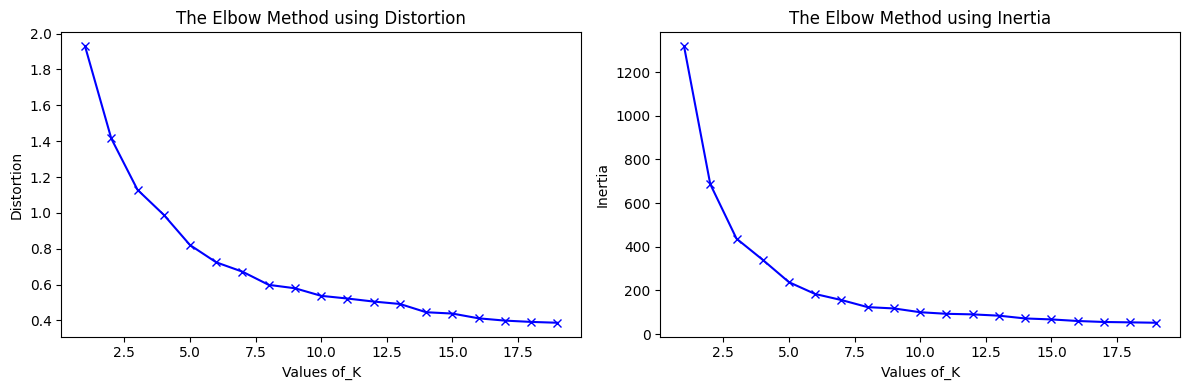

In [209]:
# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # Adjust figsize as needed

# Plot the first plot on ax1
ax1.plot(K, distortions, 'bx-')
ax1.set_xlabel('Values of_K')
ax1.set_ylabel('Distortion')
ax1.set_title('The Elbow Method using Distortion')


# Plot the second plot on ax2
ax2.plot(K, inertias, 'bx-')
ax2.set_xlabel('Values of_K')
ax2.set_ylabel('Inertia')
ax2.set_title('The Elbow Method using Inertia')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

Define the number of clusters for the clustering method combining the result of the graphs and the value of variable optimal_num_clusters

## KMeans clustering

In [220]:
# Step 4: Perform final clustering
final_kmeans = KMeans(n_clusters=7, random_state=0) # random_state fixed to 0, n_cluster changed
final_cluster_labels = final_kmeans.fit_predict(X)

# Save the result of clustering with random state 0 as a dataframe column
emb_1['label'] = final_cluster_labels  

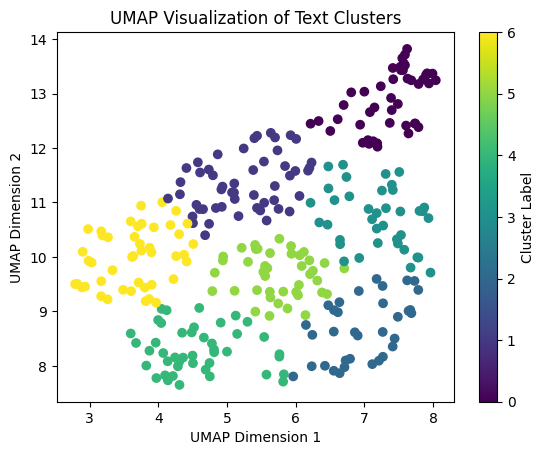

In [221]:
# Visualize clustering depending on different random states.
figures = [] # list to hold different figures. 

fig1, ax1 = plt.subplots()
scatter = ax1.scatter(X[:, 0], X[:, 1], c=final_cluster_labels, cmap='viridis')
ax1.set_xlabel('UMAP Dimension 1')
ax1.set_ylabel('UMAP Dimension 2')
ax1.set_title('UMAP Visualization of Text Clusters')

colorbar = plt.colorbar(scatter, ax=ax1)
colorbar.set_label('Cluster Label')

figures.append(fig1)

In [222]:
# Cluster labels obtained from clustering algorithm

final_cluster_labels # cluster_labels_from_bert
X # contextualized tokens of the input texts.

# Specify the question that is addressed. 
print("\n\"Question 1\"\n")

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, final_cluster_labels)
print(f"Silhouette Coefficient: {silhouette}")

# Calculate Calinski-Harabasz Index
calinski = calinski_harabasz_score(X, final_cluster_labels)
print(f"Calinski-Harabasz Index: {calinski}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, final_cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


"Question 1"

Silhouette Coefficient: 0.43576377630233765
Calinski-Harabasz Index: 379.3739454194838
Davies-Bouldin Index: 0.7108612329502206


In [223]:
demos['index'] = demos.index

/tmp/ipykernel_2838790/2801886630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demos['index'] = demos.index


In [224]:
demos

,AGE,GENDER,EDUCATION,EMPLOYMENT,INCOME,POLITICAL,DAT,CRT2,index
PARTICIPANT_ID,,,,,,,,,
00278,24,1,5,1,3,2,74.104969,3,00278
0068d,74,1,2,7,2,4,79.882640,2,0068d
00f13,43,1,4,1,3,3,77.948290,3,00f13
01cb6,56,3,2,8,1,1,78.969095,2,01cb6
02670,25,1,5,1,2,2,83.311323,1,02670
...,...,...,...,...,...,...,...,...,...
f92a4,35,1,5,1,3,3,65.242337,2,f92a4
f9fd8,50,1,4,8,2,2,80.076401,1,f9fd8
fb2a2,38,1,2,8,1,3,78.420482,0,fb2a2


In [225]:
result_1 = pd.merge(emb_1, demos, on = 'index')

In [226]:
result_1

,q1,index,label,AGE,GENDER,EDUCATION,EMPLOYMENT,INCOME,POLITICAL,DAT,CRT2
0,"[-0.0294491792, -0.047710513100000004, 0.21808...",00278,5,24,1,5,1,3,2,74.104969,3
1,"[0.018888133300000002, -0.0616387874, 0.171511...",0068d,5,74,1,2,7,2,4,79.882640,2
2,"[0.0328847421, -0.0337260091, 0.20334434880000...",00f13,6,43,1,4,1,3,3,77.948290,3
3,"[-0.042097603000000004, -0.0094608217, 0.21692...",01cb6,3,56,3,2,8,1,1,78.969095,2
4,"[0.0103939993, -0.046226321300000005, 0.175308...",02670,6,25,1,5,1,2,2,83.311323,1
...,...,...,...,...,...,...,...,...,...,...,...
293,"[0.0256816596, -0.011286425400000001, 0.160009...",f92a4,3,35,1,5,1,3,3,65.242337,2
294,"[0.0003793323, -0.0353918606, 0.2978786118, 0....",f9fd8,3,50,1,4,8,2,2,80.076401,1
295,"[0.0054284672, -0.068418537, 0.1615336072, 0.0...",fb2a2,3,38,1,2,8,1,3,78.420482,0
296,"[-0.0032344566, -0.0503300964, 0.1609090846, 0...",fb9c4,1,21,1,4,8,3,2,83.133171,1


## The number of data points in each cluster

In [227]:
# community 0
com_0 = result_1[result_1['label'] == 0]
len(com_0)

45

In [228]:
# community 1
com_1 = result_1[result_1['label'] == 1]
len(com_1)

51

In [229]:
# community 2
com_2 = result_1[result_1['label'] == 2]
len(com_2)

34

In [230]:
# community 3
com_3 = result_1[result_1['label'] == 3]
len(com_3)

38

In [231]:
# community 4
com_4 = result_1[result_1['label'] == 4] 
len(com_4)

44

In [232]:
# community 5
com_5 = result_1[result_1['label'] == 5]
len(com_5)

41

In [233]:
# community 6
com_6 = result_1[result_1['label'] == 6]

In [234]:
len(com_6)

45

## Feature exploration

In [113]:
age = result_1['AGE']

In [114]:
# delete the null valued rows in the column 'age'
age = age.dropna()

In [115]:
# mean, var, std
print("mean of age:", np.mean(age))
print("variance of age:", np.var(age))
print("standard deviation of age:", np.std(age))

mean of age: 45.83557046979866
variance of age: 242.12396964100714
standard deviation of age: 15.560333211117529


In [245]:
#### Dataframe age with each communities
age_0 = com_0['AGE']
age_1 = com_1['AGE']
age_2 = com_2['AGE']
age_3 = com_3['AGE']
age_4 = com_4['AGE']
age_5 = com_5['AGE']
age_6 = com_6['AGE']
# print cardinality, mean, var, std within the cluster.
# community_0
print("*community_0 in age")
print("how many:", len(age_0))
print("mean:", np.mean(age_0))
print("variance:", np.var(age_0))
print("std:", np.std(age_0))

# community_1
print("\n*community_1 in age ")
print("how many:", len(age_1))
print("mean:", np.mean(age_1))
print("variance:", np.var(age_1))
print("std:", np.std(age_1))

# community_2
print("*community_0 in age")
print("how many:", len(age_2))
print("mean:", np.mean(age_2))
print("variance:", np.var(age_2))
print("std:", np.std(age_2))

# community_3
print("*community_0 in age")
print("how many:", len(age_3))
print("mean:", np.mean(age_3))
print("variance:", np.var(age_3))
print("std:", np.std(age_3))

# community_4
print("*community_0 in age")
print("how many:", len(age_4))
print("mean:", np.mean(age_4))
print("variance:", np.var(age_4))
print("std:", np.std(age_4))

# community_5
print("*community_0 in age")
print("how many:", len(age_5))
print("mean:", np.mean(age_5))
print("variance:", np.var(age_5))
print("std:", np.std(age_5))

# community_6
print("*community_0 in age")
print("how many:", len(age_6))
print("mean:", np.mean(age_6))
print("variance:", np.var(age_6))
print("std:", np.std(age_6))

*community_0 in age
how many: 45
mean: 46.355555555555554
variance: 242.85135802469134
std: 15.58368884522183

*community_1 in age 
how many: 51
mean: 48.705882352941174
variance: 248.67820069204151
std: 15.769533940229227
*community_0 in age
how many: 34
mean: 38.294117647058826
variance: 231.79584775086508
std: 15.224843110878519
*community_0 in age
how many: 38
mean: 48.13157894736842
variance: 213.53531855955677
std: 14.612847722451527
*community_0 in age
how many: 44
mean: 41.45454545454545
variance: 208.8842975206612
std: 14.452830086895133
*community_0 in age
how many: 41
mean: 49.48780487804878
variance: 214.34741225461033
std: 14.640608329390222
*community_0 in age
how many: 45
mean: 46.77777777777778
variance: 234.88395061728397
std: 15.3259241358322


## Hypothesis testing

In [236]:
data = result_1

## ANOVA

## Age

In [237]:
from scipy.stats import levene, f_oneway
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.oneway import anova_oneway

In [238]:
# split the dataset for the analysis

grouped_data = [data['AGE'][data['label'] == cluster] for cluster in data['label'].unique()]

### Levene's Test

In [239]:
# Perform Levene's test
levene_stat, levene_p = levene(*grouped_data)

print(f"Levene's Test Statistic: {levene_stat}")
print(f"P-Value: {levene_p}")

# Check the result of Levene's test
if levene_p > 0.05:
    print("Variances are equal across groups (p > 0.05), you can proceed with ANOVA.\n")
    
    # Perform ANOVA
    anova_stat, anova_p = f_oneway(*grouped_data)
    
    print(f"ANOVA Test Statistic: {anova_stat}")
    print(f"P-Value: {anova_p}")
    
    if anova_p < 0.05:
        print("There is a significant difference in age across clusters (p < 0.05).")
    else:
        print("There is no significant difference in age across clusters (p > 0.05).")
else:
    print("Variances are not equal across groups (p <= 0.05), consider using a different test like Welch's ANOVA.")

Levene's Test Statistic: 0.1332930049308332
P-Value: 0.9919623011039429
Variances are equal across groups (p > 0.05), you can proceed with ANOVA.

ANOVA Test Statistic: 2.8448150567194928
P-Value: 0.010450371043321806
There is a significant difference in age across clusters (p < 0.05).


### DAT

In [240]:
# split the dataset for the analysis

grouped_data = [data['DAT'][data['label'] == cluster] for cluster in data['label'].unique()]

### Levene's Test

In [241]:
# Perform Levene's test
levene_stat, levene_p = levene(*grouped_data)

print(f"Levene's Test Statistic: {levene_stat}")
print(f"P-Value: {levene_p}")

# Check the result of Levene's test
if levene_p > 0.05:
    print("Variances are equal across groups (p > 0.05), you can proceed with ANOVA.\n")
    
    # Perform ANOVA
    anova_stat, anova_p = f_oneway(*grouped_data)
    
    print(f"ANOVA Test Statistic: {anova_stat}")
    print(f"P-Value: {anova_p}")
    
    if anova_p < 0.05:
        print("There is a significant difference in dat across clusters (p < 0.05).")
    else:
        print("There is no significant difference in dat across clusters (p > 0.05).")
else:
    print("Variances are not equal across groups (p <= 0.05), consider using a different test like Welch's ANOVA.")

Levene's Test Statistic: 0.8424205123956243
P-Value: 0.5379983907560967
Variances are equal across groups (p > 0.05), you can proceed with ANOVA.

ANOVA Test Statistic: 2.632221663722089
P-Value: 0.016804266685996508
There is a significant difference in dat across clusters (p < 0.05).


### CRT

In [242]:
# split the dataset for the analysis

grouped_data = [data['CRT2'][data['label'] == cluster] for cluster in data['label'].unique()]

### Levene's Test

In [243]:
# Perform Levene's test
levene_stat, levene_p = levene(*grouped_data)

print(f"Levene's Test Statistic: {levene_stat}")
print(f"P-Value: {levene_p}")

# Check the result of Levene's test
if levene_p > 0.05:
    print("Variances are equal across groups (p > 0.05), you can proceed with ANOVA.\n")
    
    # Perform ANOVA
    anova_stat, anova_p = f_oneway(*grouped_data)
    
    print(f"ANOVA Test Statistic: {anova_stat}")
    print(f"P-Value: {anova_p}")
    
    if anova_p < 0.05:
        print("There is a significant difference in crt across clusters (p < 0.05).")
    else:
        print("There is no significant difference in crt across clusters (p > 0.05).")
else:
    print("Variances are not equal across groups (p <= 0.05), consider using a different test like Welch's ANOVA.")

Levene's Test Statistic: 2.3575211014929165
P-Value: 0.030699091055258233
Variances are not equal across groups (p <= 0.05), consider using a different test like Welch's ANOVA.


In [244]:
# Perform Welch's ANOVA
# anova_oneway method performs Welch's ANOVA when using welch=True
welch_anova = anova_oneway(data['CRT2'], data['label'], use_var='unequal')

# Extract and print the results
print(f"Welch's ANOVA Test Statistic: {welch_anova.statistic}")
print(f"P-Value: {welch_anova.pvalue}")

if welch_anova.pvalue < 0.05:
    print("There is a significant difference in crt across clusters (p < 0.05).")
else:
    print("There is no significant difference in crt across clusters (p > 0.05).")

Welch's ANOVA Test Statistic: 2.9080706562739596
P-Value: 0.01087912492384653
There is a significant difference in crt across clusters (p < 0.05).


## Chi-Square Test
### Check the expected frequency
* It is supposed to be, Every cell > 0, 80% of the cells >= 5

In [246]:
from scipy.stats import chi2_contingency
import statsmodels.api as sm

### Gender

In [247]:
# Create a contingency table
contingency_table = pd.crosstab(data['GENDER'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    30.0158
Degrees of Freedom:       18
p-value:                  3.7293e-02

Expected Frequencies (rounded):
label       0      1      2      3      4      5      6
GENDER                                                 
1       22.80  25.84  17.23  19.26  22.30  20.78  22.80
2        0.15   0.17   0.11   0.13   0.15   0.14   0.15
3       21.90  24.82  16.54  18.49  21.41  19.95  21.90
5        0.15   0.17   0.11   0.13   0.15   0.14   0.15


### Cut off the dataset

In [248]:
contingency_table_filtered = contingency_table.loc[[1, 3]]

In [249]:
# Perform Chi-Square test
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results
print("Expected Frequencies:")
print(expected)

# Check if all expected frequencies are >= 5
if np.all(expected >= 5):
    print("All expected frequencies are >= 5. The Chi-Square test can be used.")
else:
    print("Some expected frequencies are < 5. Check if the cells <5 are more than 20% of the entire cells. Then consider using Fisher's Exact Test or combining categories.")

Expected Frequencies:
[[22.95608108 26.01689189 16.83445946 19.38513514 22.44594595 20.40540541
  22.95608108]
 [22.04391892 24.98310811 16.16554054 18.61486486 21.55405405 19.59459459
  22.04391892]]
All expected frequencies are >= 5. The Chi-Square test can be used.


In [250]:
# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table_filtered.index, 
                   columns=contingency_table_filtered.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    15.9191
Degrees of Freedom:       6
p-value:                  1.4195e-02

Expected Frequencies (rounded):
label       0      1      2      3      4      5      6
GENDER                                                 
1       22.96  26.02  16.83  19.39  22.45  20.41  22.96
3       22.04  24.98  16.17  18.61  21.55  19.59  22.04


**Result:** p value is not below 0.05, therefore there is no significant difference in age by clusters.

### Income

In [251]:
# Create a contingency table
contingency_table = pd.crosstab(data['INCOME'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    19.0100
Degrees of Freedom:       24
p-value:                  7.5145e-01

Expected Frequencies (rounded):
label       0      1      2      3      4      5      6
INCOME                                                 
1       11.17  12.66   8.44   9.44  10.93  10.18  11.17
2       16.91  19.17  12.78  14.28  16.54  15.41  16.91
3        9.21  10.44   6.96   7.78   9.01   8.39   9.21
4        6.04   6.85   4.56   5.10   5.91   5.50   6.04
5        1.66   1.88   1.26   1.40   1.62   1.51   1.66


**RESULT:** Expected frequency meets the assumptions, so it is valid analysis

* Income shows NO significant difference between the clusters

### Employment -> expected frequency was not good, could not finish.

In [252]:
# Create a contingency table
contingency_table = pd.crosstab(data['EMPLOYMENT'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    44.3010
Degrees of Freedom:       42
p-value:                  3.7482e-01

Expected Frequencies (rounded):
label           0      1      2      3      4      5      6
EMPLOYMENT                                                 
1           16.76  19.00  12.66  14.15  16.39  15.27  16.76
2            6.19   7.02   4.68   5.23   6.05   5.64   6.19
3            1.96   2.22   1.48   1.66   1.92   1.79   1.96
4            6.64   7.53   5.02   5.61   6.50   6.05   6.64
5            2.42   2.74   1.83   2.04   2.36   2.20   2.42
6            2.57   2.91   1.94   2.17   2.51   2.34   2.57
7            6.19   7.02   4.68   5.23   6.05   5.64   6.19
8            2.27   2.57   1.71   1.91   2.21   2.06   2.27


* Assumption is bit met, but not so valid for the Chi-Square.

### Education

In [253]:
# Create a contingency table
contingency_table = pd.crosstab(data['EDUCATION'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    31.2424
Degrees of Freedom:       24
p-value:                  1.4692e-01

Expected Frequencies (rounded):
label          0      1      2      3      4      5      6
EDUCATION                                                 
2          11.63  13.18   8.79   9.82  11.37  10.59  11.63
3           8.00   9.07   6.05   6.76   7.83   7.29   8.00
4          16.46  18.65  12.44  13.90  16.09  15.00  16.46
5           8.61   9.76   6.50   7.27   8.42   7.84   8.61
6           0.30   0.34   0.23   0.26   0.30   0.28   0.30


In [254]:
# filter only the 1,2 voted participants
contingency_table_filtered = contingency_table.loc[[2, 3, 4, 5]]

In [255]:
contingency_table_filtered

label,0,1,2,3,4,5,6
EDUCATION,,,,,,,
2,17,8,11,14,10,7,10
3,8,14,5,7,3,8,8
4,15,16,14,11,21,12,20
5,5,12,4,6,9,14,7


In [256]:
# Perform Chi-Square test
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results
print("Expected Frequencies:")
print(expected)

# Check if all expected frequencies are >= 5
if np.all(expected >= 5):
    print("All expected frequencies are >= 5. The Chi-Square test can be used.")
else:
    print("Some expected frequencies are < 5. Check if the cells <5 are more than 20% of the entire cells. Then consider using Fisher's Exact Test or combining categories.")

Expected Frequencies:
[[11.70608108 13.00675676  8.84459459  9.88513514 11.18581081 10.66554054
  11.70608108]
 [ 8.05743243  8.9527027   6.08783784  6.80405405  7.69932432  7.34121622
   8.05743243]
 [16.57094595 18.41216216 12.52027027 13.99324324 15.83445946 15.09797297
  16.57094595]
 [ 8.66554054  9.62837838  6.5472973   7.31756757  8.28040541  7.89527027
   8.66554054]]
All expected frequencies are >= 5. The Chi-Square test can be used.


* Assumption is met regarding the expected frequency

### Chi-Square test

In [257]:
# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table_filtered.index, 
                   columns=contingency_table_filtered.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    26.9438
Degrees of Freedom:       18
p-value:                  8.0056e-02

Expected Frequencies (rounded):
label          0      1      2      3      4      5      6
EDUCATION                                                 
2          11.71  13.01   8.84   9.89  11.19  10.67  11.71
3           8.06   8.95   6.09   6.80   7.70   7.34   8.06
4          16.57  18.41  12.52  13.99  15.83  15.10  16.57
5           8.67   9.63   6.55   7.32   8.28   7.90   8.67


* Result: There is no evidence of significant difference between clusters on EDUCATION

### Political leaning

In [258]:
# Create a contingency table
contingency_table = pd.crosstab(data['POLITICAL'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    29.8325
Degrees of Freedom:       24
p-value:                  1.9037e-01

Expected Frequencies (rounded):
label          0      1      2      3      4      5      6
POLITICAL                                                 
1           4.98   5.65   3.77   4.21   4.87   4.54   4.98
2          15.25  17.29  11.52  12.88  14.91  13.90  15.25
3          17.82  20.19  13.46  15.05  17.42  16.23  17.82
4           5.59   6.33   4.22   4.72   5.46   5.09   5.59
5           1.36   1.54   1.03   1.15   1.33   1.24   1.36


In [261]:
contingency_table_filtered = contingency_table.loc[[1,2,3,4]]

In [262]:
# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table_filtered.index, 
                   columns=contingency_table_filtered.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    20.0993
Degrees of Freedom:       18
p-value:                  3.2726e-01

Expected Frequencies (rounded):
label          0      1      2      3      4      5      6
POLITICAL                                                 
1           4.91   5.60   3.88   4.22   5.02   4.68   4.68
2          15.03  17.12  11.88  12.93  15.38  14.33  14.33
3          17.56  20.01  13.88  15.11  17.97  16.74  16.74
4           5.51   6.27   4.35   4.74   5.63   5.25   5.25


### Question 2
"How could we improve gender equality at work?"

In [263]:
# convert list to numpy array to make an input to embeddings
emb_2['q2'] = emb_2['q2'].apply(np.array)  
matrix = np.vstack(emb_2['q2'].values)
matrix.shape

(298, 1536)

In [264]:
X = matrix.copy()

## Dimensionality reduction (umap)

In [265]:
# Step 1: Normalize the data
from sklearn.preprocessing import StandardScaler
normalized_embeddings = StandardScaler().fit_transform(X)

In [266]:
# Step 2: Apply UMAP for dimensionality reduction
umap_model = UMAP(n_neighbors=10, min_dist=0.1, n_components=2, random_state = 42)
umap_embeddings = umap_model.fit_transform(normalized_embeddings)
X = umap_embeddings.copy()

/mnt/home/kim/venvs/my_environment/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [267]:
# Step 3: Use silhouette score to find optimal number of clusters
silhouette_scores = []
for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

The last line derives from the fact that silhouette score is calculated from the num_cluster 2, so therefore if retrieving index of the lists, the first element's index is 0 but it indicates the value of num_cluster 2, therefore +2 would make it easier to retrieve the value. 


In [268]:
optimal_num_clusters

3

In [269]:
# Use Elbow-analysis as well to find optimal number of clusters
# Elbow analysis
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(np.sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = np.sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

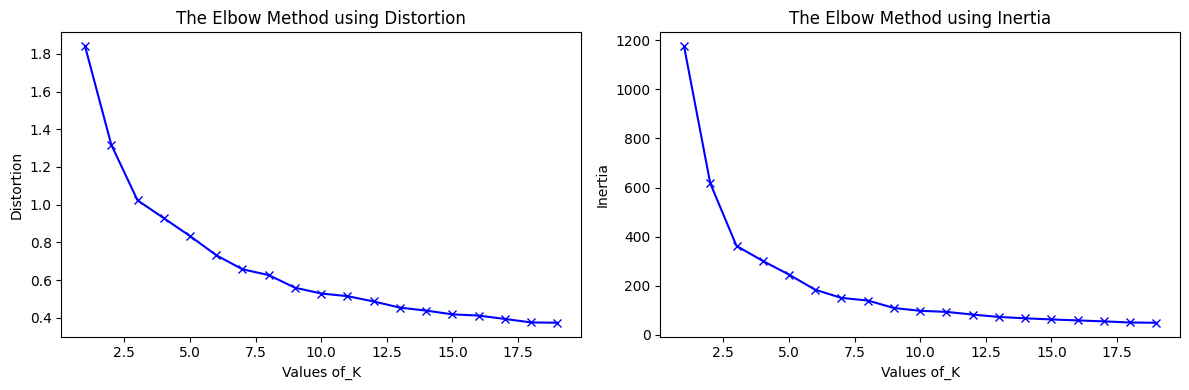

In [270]:
# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # Adjust figsize as needed

# Plot the first plot on ax1
ax1.plot(K, distortions, 'bx-')
ax1.set_xlabel('Values of_K')
ax1.set_ylabel('Distortion')
ax1.set_title('The Elbow Method using Distortion')


# Plot the second plot on ax2
ax2.plot(K, inertias, 'bx-')
ax2.set_xlabel('Values of_K')
ax2.set_ylabel('Inertia')
ax2.set_title('The Elbow Method using Inertia')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

Define the number of clusters for the clustering method combining the result of the graphs and the value of variable optimal_num_clusters

## KMeans clustering

In [271]:
# Step 4: Perform final clustering
final_kmeans = KMeans(n_clusters=3, random_state=0) # random_state fixed to 0, n_cluster changed
final_cluster_labels = final_kmeans.fit_predict(X)

# Save the result of clustering with random state 0 as a dataframe column
emb_2['label'] = final_cluster_labels  

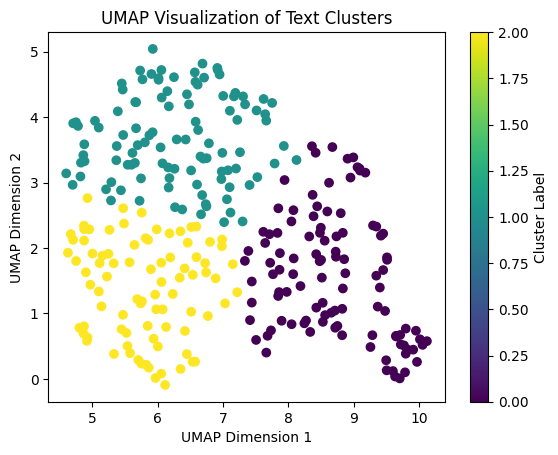

In [272]:
# Visualize clustering depending on different random states.
figures = [] # list to hold different figures. 

fig1, ax1 = plt.subplots()
scatter = ax1.scatter(X[:, 0], X[:, 1], c=final_cluster_labels, cmap='viridis')
ax1.set_xlabel('UMAP Dimension 1')
ax1.set_ylabel('UMAP Dimension 2')
ax1.set_title('UMAP Visualization of Text Clusters')

colorbar = plt.colorbar(scatter, ax=ax1)
colorbar.set_label('Cluster Label')

figures.append(fig1)

In [273]:
# Cluster labels obtained from clustering algorithm

final_cluster_labels # cluster_labels_from_bert
X # contextualized tokens of the input texts.

# Specify the question that is addressed. 
print("\n\"Question 2\"\n")

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, final_cluster_labels)
print(f"Silhouette Coefficient: {silhouette}")

# Calculate Calinski-Harabasz Index
calinski = calinski_harabasz_score(X, final_cluster_labels)
print(f"Calinski-Harabasz Index: {calinski}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, final_cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


"Question 2"

Silhouette Coefficient: 0.44346189498901367
Calinski-Harabasz Index: 331.8153047365266
Davies-Bouldin Index: 0.7939731013186506


### Connect it with the demographics

In [274]:
result_2 = pd.merge(emb_2, demos, on = 'index')

In [275]:
result_2

,q2,index,label,AGE,GENDER,EDUCATION,EMPLOYMENT,INCOME,POLITICAL,DAT,CRT2
0,"[0.0918020925, -0.0109149959, 0.1833420191, 0....",00278,2,24,1,5,1,3,2,74.104969,3
1,"[0.0832927702, -0.009694383, 0.2658800595, 0.0...",0068d,1,74,1,2,7,2,4,79.882640,2
2,"[0.0394748142, 0.0023149154, 0.2393497447, 0.0...",00f13,2,43,1,4,1,3,3,77.948290,3
3,"[-0.0021283467, -0.0372710206, 0.2095754072, 0...",01cb6,2,56,3,2,8,1,1,78.969095,2
4,"[0.0556098717, -0.0195356798, 0.1855096575, 0....",02670,2,25,1,5,1,2,2,83.311323,1
...,...,...,...,...,...,...,...,...,...,...,...
293,"[0.047979642, -0.0532892847, 0.201525289600000...",f92a4,1,35,1,5,1,3,3,65.242337,2
294,"[0.0246761884, 0.028847442900000003, 0.1663649...",f9fd8,0,50,1,4,8,2,2,80.076401,1
295,"[0.021872717, -0.0064260669, 0.111354785000000...",fb2a2,0,38,1,2,8,1,3,78.420482,0
296,"[0.012859582900000001, -0.0227323589, 0.240694...",fb9c4,2,21,1,4,8,3,2,83.133171,1


## Hypothesis testing

In [276]:
data = result_2

In [277]:
from scipy.stats import chi2_contingency
import statsmodels.api as sm

## ANOVA

### Age

In [278]:
from scipy.stats import levene, f_oneway
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.oneway import anova_oneway

In [279]:
# split the dataset for the analysis

grouped_data = [data['AGE'][data['label'] == cluster] for cluster in data['label'].unique()]

### Levene's Test

In [280]:
# Perform Levene's test
levene_stat, levene_p = levene(*grouped_data)

print(f"Levene's Test Statistic: {levene_stat}")
print(f"P-Value: {levene_p}")

# Check the result of Levene's test
if levene_p > 0.05:
    print("Variances are equal across groups (p > 0.05), you can proceed with ANOVA.\n")
    
    # Perform ANOVA
    anova_stat, anova_p = f_oneway(*grouped_data)
    
    print(f"ANOVA Test Statistic: {anova_stat}")
    print(f"P-Value: {anova_p}")
    
    if anova_p < 0.05:
        print("There is a significant difference in age across clusters (p < 0.05).")
    else:
        print("There is no significant difference in age across clusters (p > 0.05).")
else:
    print("Variances are not equal across groups (p <= 0.05), consider using a different test like Welch's ANOVA.")

Levene's Test Statistic: 1.5687048138435966
P-Value: 0.21004748007087554
Variances are equal across groups (p > 0.05), you can proceed with ANOVA.

ANOVA Test Statistic: 0.23137575226238197
P-Value: 0.7935851240151133
There is no significant difference in age across clusters (p > 0.05).


### DAT

In [281]:
# split the dataset for the analysis

grouped_data = [data['DAT'][data['label'] == cluster] for cluster in data['label'].unique()]

### Levene's Test

In [282]:
# Perform Levene's test
levene_stat, levene_p = levene(*grouped_data)

print(f"Levene's Test Statistic: {levene_stat}")
print(f"P-Value: {levene_p}")

# Check the result of Levene's test
if levene_p > 0.05:
    print("Variances are equal across groups (p > 0.05), you can proceed with ANOVA.\n")
    
    # Perform ANOVA
    anova_stat, anova_p = f_oneway(*grouped_data)
    
    print(f"ANOVA Test Statistic: {anova_stat}")
    print(f"P-Value: {anova_p}")
    
    if anova_p < 0.05:
        print("There is a significant difference in dat across clusters (p < 0.05).")
    else:
        print("There is no significant difference in dat across clusters (p > 0.05).")
else:
    print("Variances are not equal across groups (p <= 0.05), consider using a different test like Welch's ANOVA.")

Levene's Test Statistic: 1.2732384287896237
P-Value: 0.28145731602166435
Variances are equal across groups (p > 0.05), you can proceed with ANOVA.

ANOVA Test Statistic: 2.089137673734534
P-Value: 0.1256216077206222
There is no significant difference in dat across clusters (p > 0.05).


### CRT

In [283]:
# split the dataset for the analysis

grouped_data = [data['CRT2'][data['label'] == cluster] for cluster in data['label'].unique()]

### Levene's Test

In [284]:
# Perform Levene's test
levene_stat, levene_p = levene(*grouped_data)

print(f"Levene's Test Statistic: {levene_stat}")
print(f"P-Value: {levene_p}")

# Check the result of Levene's test
if levene_p > 0.05:
    print("Variances are equal across groups (p > 0.05), you can proceed with ANOVA.\n")
    
    # Perform ANOVA
    anova_stat, anova_p = f_oneway(*grouped_data)
    
    print(f"ANOVA Test Statistic: {anova_stat}")
    print(f"P-Value: {anova_p}")
    
    if anova_p < 0.05:
        print("There is a significant difference in crt across clusters (p < 0.05).")
    else:
        print("There is no significant difference in crt across clusters (p > 0.05).")
else:
    print("Variances are not equal across groups (p <= 0.05), consider using a different test like Welch's ANOVA.")

Levene's Test Statistic: 2.690703171606873
P-Value: 0.06949811613288673
Variances are equal across groups (p > 0.05), you can proceed with ANOVA.

ANOVA Test Statistic: 3.066127064992534
P-Value: 0.04808939164716108
There is a significant difference in crt across clusters (p < 0.05).


## Chi-Square Test
### Check the expected frequency
* It is supposed to be, Every cell > 0, 80% of the cells >= 5

In [285]:
from scipy.stats import chi2_contingency
import statsmodels.api as sm

### Gender

In [286]:
# Create a contingency table
contingency_table = pd.crosstab(data['GENDER'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    4.9767
Degrees of Freedom:       6
p-value:                  5.4681e-01

Expected Frequencies (rounded):
label       0      1      2
GENDER                     
1       53.71  53.71  43.58
2        0.36   0.36   0.29
3       51.58  51.58  41.85
5        0.36   0.36   0.29


### Cut off the dataset

In [287]:
contingency_table_filtered = contingency_table.loc[[1, 3]]

In [288]:
# Perform Chi-Square test
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results
print("Expected Frequencies:")
print(expected)

# Check if all expected frequencies are >= 5
if np.all(expected >= 5):
    print("All expected frequencies are >= 5. The Chi-Square test can be used.")
else:
    print("Some expected frequencies are < 5. Check if the cells <5 are more than 20% of the entire cells. Then consider using Fisher's Exact Test or combining categories.")

Expected Frequencies:
[[54.07432432 53.56418919 43.36148649]
 [51.92567568 51.43581081 41.63851351]]
All expected frequencies are >= 5. The Chi-Square test can be used.


In [289]:
# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table_filtered.index, 
                   columns=contingency_table_filtered.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    0.6918
Degrees of Freedom:       2
p-value:                  7.0759e-01

Expected Frequencies (rounded):
label       0      1      2
GENDER                     
1       54.07  53.56  43.36
3       51.93  51.44  41.64


**Result:** p value is not below 0.05, therefore there is no significant difference in age by clusters.

### Income

In [290]:
# Create a contingency table
contingency_table = pd.crosstab(data['INCOME'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    13.3218
Degrees of Freedom:       8
p-value:                  1.0125e-01

Expected Frequencies (rounded):
label       0      1      2
INCOME                     
1       26.32  26.32  21.36
2       40.55  40.55  32.90
3       20.99  20.99  17.03
4       14.23  14.23  11.54
5        3.91   3.91   3.17


**RESULT:** Expected frequency meets the assumptions, so it is valid analysis

* Income shows NO significant difference between the clusters

### Employment -> expected frequency was not good, could not finish.

In [291]:
# Create a contingency table
contingency_table = pd.crosstab(data['EMPLOYMENT'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    15.3224
Degrees of Freedom:       14
p-value:                  3.5648e-01

Expected Frequencies (rounded):
label           0      1      2
EMPLOYMENT                     
1           39.13  39.13  31.74
2           14.58  14.58  11.83
3            4.62   4.62   3.75
4           15.30  15.30  12.41
5            5.69   5.69   4.62
6            6.40   6.40   5.19
7           14.94  14.94  12.12
8            5.34   5.34   4.33


* Assumption is bit met, but not so valid for the Chi-Square.

### Education

In [292]:
# Create a contingency table
contingency_table = pd.crosstab(data['EDUCATION'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    10.0605
Degrees of Freedom:       8
p-value:                  2.6081e-01

Expected Frequencies (rounded):
label          0      1      2
EDUCATION                     
2          27.74  27.74  22.51
3          19.21  19.21  15.58
4          38.42  38.42  31.17
5          19.92  19.92  16.16
6           0.71   0.71   0.58


In [293]:
# filter only the 1,2 voted participants
contingency_table_filtered = contingency_table.loc[[2, 3, 4, 5]]

In [294]:
contingency_table_filtered

label,0,1,2
EDUCATION,,,
2,32,31,15
3,19,22,13
4,38,35,35
5,16,17,23


In [295]:
# Perform Chi-Square test
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results
print("Expected Frequencies:")
print(expected)

# Check if all expected frequencies are >= 5
if np.all(expected >= 5):
    print("All expected frequencies are >= 5. The Chi-Square test can be used.")
else:
    print("Some expected frequencies are < 5. Check if the cells <5 are more than 20% of the entire cells. Then consider using Fisher's Exact Test or combining categories.")

Expected Frequencies:
[[27.66891892 27.66891892 22.66216216]
 [19.15540541 19.15540541 15.68918919]
 [38.31081081 38.31081081 31.37837838]
 [19.86486486 19.86486486 16.27027027]]
All expected frequencies are >= 5. The Chi-Square test can be used.


* Assumption is met regarding the expected frequency

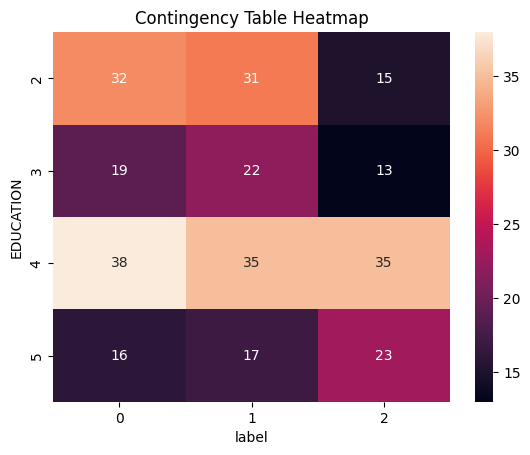

In [296]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the contingency table
sns.heatmap(contingency_table_filtered, annot=True, fmt='d')
plt.title("Contingency Table Heatmap")
plt.show()

### Chi-Square test

In [297]:
# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table_filtered.index, 
                   columns=contingency_table_filtered.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    9.2095
Degrees of Freedom:       6
p-value:                  1.6213e-01

Expected Frequencies (rounded):
label          0      1      2
EDUCATION                     
2          27.67  27.67  22.66
3          19.16  19.16  15.69
4          38.31  38.31  31.38
5          19.86  19.86  16.27


* Result: There is no significant difference in Education

### Political leaning

In [298]:
# Create a contingency table
contingency_table = pd.crosstab(data['POLITICAL'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    10.1036
Degrees of Freedom:       8
p-value:                  2.5783e-01

Expected Frequencies (rounded):
label          0      1      2
POLITICAL                     
1          11.74  11.74   9.52
2          35.57  35.57  28.86
3          41.97  41.97  34.05
4          13.52  13.52  10.97
5           3.20   3.20   2.60


**Result**: The political leaning shows no significant difference between clusters.

### Question 3
"How could we prevent the extinction of the elephant?"

In [299]:
# convert list to numpy array to make an input to embeddings
emb_3['q3'] = emb_3['q3'].apply(np.array)  
matrix = np.vstack(emb_3['q3'].values)
matrix.shape

(299, 1536)

In [300]:
X = matrix.copy()

## Dimensionality reduction (umap)

In [301]:
# Step 1: Normalize the data
from sklearn.preprocessing import StandardScaler
normalized_embeddings = StandardScaler().fit_transform(X)

In [302]:
# Step 2: Apply UMAP for dimensionality reduction
umap_model = UMAP(n_neighbors=10, min_dist=0.1, n_components=2, random_state = 42)
umap_embeddings = umap_model.fit_transform(normalized_embeddings)
X = umap_embeddings.copy()

/mnt/home/kim/venvs/my_environment/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [303]:
# Step 3: Use silhouette score to find optimal number of clusters
silhouette_scores = []
for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

The last line derives from the fact that silhouette score is calculated from the num_cluster 2, so therefore if retrieving index of the lists, the first element's index is 0 but it indicates the value of num_cluster 2, therefore +2 would make it easier to retrieve the value. 


In [304]:
optimal_num_clusters

3

In [305]:
# Use Elbow-analysis as well to find optimal number of clusters
# Elbow analysis
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(np.sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = np.sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

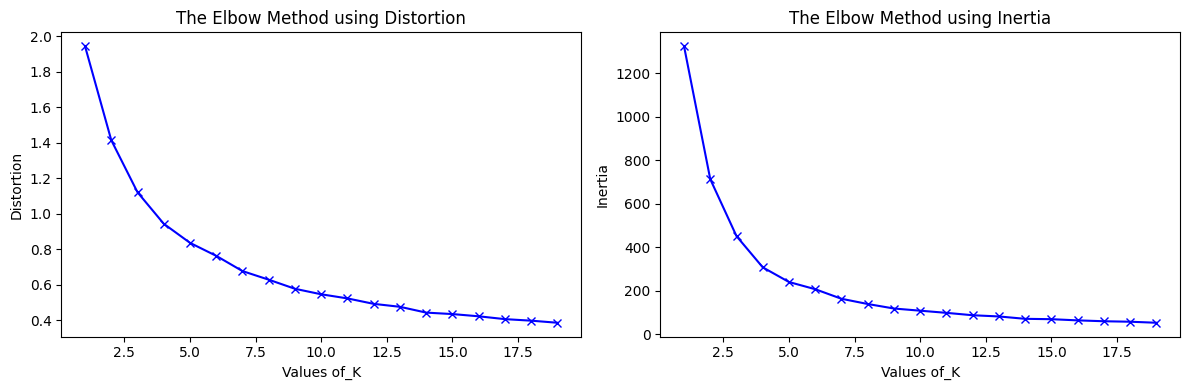

In [306]:
# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # Adjust figsize as needed

# Plot the first plot on ax1
ax1.plot(K, distortions, 'bx-')
ax1.set_xlabel('Values of_K')
ax1.set_ylabel('Distortion')
ax1.set_title('The Elbow Method using Distortion')


# Plot the second plot on ax2
ax2.plot(K, inertias, 'bx-')
ax2.set_xlabel('Values of_K')
ax2.set_ylabel('Inertia')
ax2.set_title('The Elbow Method using Inertia')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

Define the number of clusters for the clustering method combining the result of the graphs and the value of variable optimal_num_clusters

## KMeans clustering

In [321]:
# Step 4: Perform final clustering
final_kmeans = KMeans(n_clusters=3, random_state=0) # random_state fixed to 0, n_cluster changed
final_cluster_labels = final_kmeans.fit_predict(X)

# Save the result of clustering with random state 0 as a dataframe column
emb_3['label'] = final_cluster_labels  

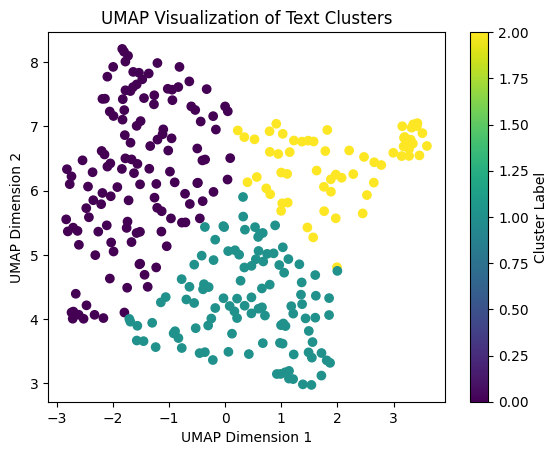

In [322]:
# Visualize clustering depending on different random states.
figures = [] # list to hold different figures. 

fig1, ax1 = plt.subplots()
scatter = ax1.scatter(X[:, 0], X[:, 1], c=final_cluster_labels, cmap='viridis')
ax1.set_xlabel('UMAP Dimension 1')
ax1.set_ylabel('UMAP Dimension 2')
ax1.set_title('UMAP Visualization of Text Clusters')

colorbar = plt.colorbar(scatter, ax=ax1)
colorbar.set_label('Cluster Label')

figures.append(fig1)

In [323]:
# Cluster labels obtained from clustering algorithm

final_cluster_labels # cluster_labels_from_bert
X # contextualized tokens of the input texts.

# Specify the question that is addressed. 
print("\n\"Question 3\"\n")

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, final_cluster_labels)
print(f"Silhouette Coefficient: {silhouette}")

# Calculate Calinski-Harabasz Index
calinski = calinski_harabasz_score(X, final_cluster_labels)
print(f"Calinski-Harabasz Index: {calinski}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, final_cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


"Question 3"

Silhouette Coefficient: 0.43489089608192444
Calinski-Harabasz Index: 287.07865730269265
Davies-Bouldin Index: 0.7939026165769985


### Connect it with the demographics

In [324]:
result_3 = pd.merge(emb_3, demos, on = 'index')

In [325]:
result_3

,q3,index,label,AGE,GENDER,EDUCATION,EMPLOYMENT,INCOME,POLITICAL,DAT,CRT2
0,"[0.1661505885, -0.030773467500000002, 0.204519...",00278,1,24,1,5,1,3,2,74.104969,3
1,"[0.0398899834, -0.029845013700000003, 0.225772...",0068d,2,74,1,2,7,2,4,79.882640,2
2,"[0.1003923068, -0.0289152393, 0.24407228920000...",00f13,0,43,1,4,1,3,3,77.948290,3
3,"[0.0314693609, -0.0571225416, 0.3008553348, 0....",01cb6,1,56,3,2,8,1,1,78.969095,2
4,"[0.1300005894, -0.096013552, 0.2421013229, 0.1...",02670,0,25,1,5,1,2,2,83.311323,1
...,...,...,...,...,...,...,...,...,...,...,...
294,"[0.0529920389, -0.0187411843, 0.17638164010000...",f92a4,2,35,1,5,1,3,3,65.242337,2
295,"[0.08338780030000001, -0.0451844858, 0.2833924...",f9fd8,1,50,1,4,8,2,2,80.076401,1
296,"[0.08418761550000001, -0.010727523400000001, 0...",fb2a2,1,38,1,2,8,1,3,78.420482,0
297,"[0.1432811618, -0.0515241906, 0.2115084827, 0....",fb9c4,0,21,1,4,8,3,2,83.133171,1


## Hypothesis testing

In [326]:
data = result_3

## ANOVA

### Age

In [327]:
from scipy.stats import levene, f_oneway
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.oneway import anova_oneway

In [328]:
# split the dataset for the analysis

grouped_data = [data['AGE'][data['label'] == cluster] for cluster in data['label'].unique()]

### Levene's Test

In [329]:
# Perform Levene's test
levene_stat, levene_p = levene(*grouped_data)

print(f"Levene's Test Statistic: {levene_stat}")
print(f"P-Value: {levene_p}")

# Check the result of Levene's test
if levene_p > 0.05:
    print("Variances are equal across groups (p > 0.05), you can proceed with ANOVA.\n")
    
    # Perform ANOVA
    anova_stat, anova_p = f_oneway(*grouped_data)
    
    print(f"ANOVA Test Statistic: {anova_stat}")
    print(f"P-Value: {anova_p}")
    
    if anova_p < 0.05:
        print("There is a significant difference in age across clusters (p < 0.05).")
    else:
        print("There is no significant difference in age across clusters (p > 0.05).")
else:
    print("Variances are not equal across groups (p <= 0.05), consider using a different test like Welch's ANOVA.")

Levene's Test Statistic: 0.32296195118615295
P-Value: 0.7242561989919851
Variances are equal across groups (p > 0.05), you can proceed with ANOVA.

ANOVA Test Statistic: 0.7443583401613131
P-Value: 0.47592607712139556
There is no significant difference in age across clusters (p > 0.05).


### DAT

In [330]:
# split the dataset for the analysis

grouped_data = [data['DAT'][data['label'] == cluster] for cluster in data['label'].unique()]

### Levene's Test

In [331]:
# Perform Levene's test
levene_stat, levene_p = levene(*grouped_data)

print(f"Levene's Test Statistic: {levene_stat}")
print(f"P-Value: {levene_p}")

# Check the result of Levene's test
if levene_p > 0.05:
    print("Variances are equal across groups (p > 0.05), you can proceed with ANOVA.\n")
    
    # Perform ANOVA
    anova_stat, anova_p = f_oneway(*grouped_data)
    
    print(f"ANOVA Test Statistic: {anova_stat}")
    print(f"P-Value: {anova_p}")
    
    if anova_p < 0.05:
        print("There is a significant difference in dat across clusters (p < 0.05).")
    else:
        print("There is no significant difference in dat across clusters (p > 0.05).")
else:
    print("Variances are not equal across groups (p <= 0.05), consider using a different test like Welch's ANOVA.")

Levene's Test Statistic: 0.06390862367215708
P-Value: 0.9381036553692131
Variances are equal across groups (p > 0.05), you can proceed with ANOVA.

ANOVA Test Statistic: 12.098794095094116
P-Value: 8.89817397346049e-06
There is a significant difference in dat across clusters (p < 0.05).


### CRT

In [332]:
# split the dataset for the analysis

grouped_data = [data['CRT2'][data['label'] == cluster] for cluster in data['label'].unique()]

### Levene's Test

In [333]:
# Perform Levene's test
levene_stat, levene_p = levene(*grouped_data)

print(f"Levene's Test Statistic: {levene_stat}")
print(f"P-Value: {levene_p}")

# Check the result of Levene's test
if levene_p > 0.05:
    print("Variances are equal across groups (p > 0.05), you can proceed with ANOVA.\n")
    
    # Perform ANOVA
    anova_stat, anova_p = f_oneway(*grouped_data)
    
    print(f"ANOVA Test Statistic: {anova_stat}")
    print(f"P-Value: {anova_p}")
    
    if anova_p < 0.05:
        print("There is a significant difference in crt across clusters (p < 0.05).")
    else:
        print("There is no significant difference in crt across clusters (p > 0.05).")
else:
    print("Variances are not equal across groups (p <= 0.05), consider using a different test like Welch's ANOVA.")

Levene's Test Statistic: 1.229129903058378
P-Value: 0.2940357069866763
Variances are equal across groups (p > 0.05), you can proceed with ANOVA.

ANOVA Test Statistic: 4.575628914812152
P-Value: 0.011038978760181943
There is a significant difference in crt across clusters (p < 0.05).


In [334]:
# Perform Welch's ANOVA
# anova_oneway method performs Welch's ANOVA when using welch=True
welch_anova = anova_oneway(data['CRT2'], data['label'], use_var='unequal')

# Extract and print the results
print(f"Welch's ANOVA Test Statistic: {welch_anova.statistic}")
print(f"P-Value: {welch_anova.pvalue}")

if welch_anova.pvalue < 0.05:
    print("There is a significant difference in crt across clusters (p < 0.05).")
else:
    print("There is no significant difference in crt across clusters (p > 0.05).")

Welch's ANOVA Test Statistic: 4.324762429359219
P-Value: 0.01490541095355227
There is a significant difference in crt across clusters (p < 0.05).


## Chi-Square Test
### Check the expected frequency
* It is supposed to be, Every cell > 0, 80% of the cells >= 5

In [335]:
from scipy.stats import chi2_contingency
import statsmodels.api as sm

### Gender

In [336]:
# Create a contingency table
contingency_table = pd.crosstab(data['GENDER'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    4.9024
Degrees of Freedom:       6
p-value:                  5.5640e-01

Expected Frequencies (rounded):
label       0      1      2
GENDER                     
1       65.58  55.41  31.01
2        0.43   0.36   0.20
3       62.56  52.86  29.58
5        0.43   0.36   0.20


### Cut off the dataset

In [337]:
contingency_table_filtered = contingency_table.loc[[1, 3]]

In [338]:
# Perform Chi-Square test
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results
print("Expected Frequencies:")
print(expected)

# Check if all expected frequencies are >= 5
if np.all(expected >= 5):
    print("All expected frequencies are >= 5. The Chi-Square test can be used.")
else:
    print("Some expected frequencies are < 5. Check if the cells <5 are more than 20% of the entire cells. Then consider using Fisher's Exact Test or combining categories.")

Expected Frequencies:
[[64.996633   55.78451178 31.21885522]
 [62.003367   53.21548822 29.78114478]]
All expected frequencies are >= 5. The Chi-Square test can be used.


In [339]:
# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table_filtered.index, 
                   columns=contingency_table_filtered.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    2.2515
Degrees of Freedom:       2
p-value:                  3.2441e-01

Expected Frequencies (rounded):
label      0      1      2
GENDER                    
1       65.0  55.78  31.22
3       62.0  53.22  29.78


**Result:** p value is not below 0.05, therefore there is no significant difference in age by clusters.

### Income

In [340]:
# Create a contingency table
contingency_table = pd.crosstab(data['INCOME'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    7.2805
Degrees of Freedom:       8
p-value:                  5.0669e-01

Expected Frequencies (rounded):
label       0      1      2
INCOME                     
1       31.49  26.61  14.89
2       49.18  41.56  23.26
3       26.32  22.24  12.44
4       17.26  14.58   8.16
5        4.75   4.01   2.24


**RESULT:** Expected frequency meets the assumptions, so it is valid analysis

* Income shows NO significant difference between the clusters

### Employment -> expected frequency was not good, could not finish.

In [341]:
# Create a contingency table
contingency_table = pd.crosstab(data['EMPLOYMENT'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    18.0437
Degrees of Freedom:       14
p-value:                  2.0480e-01

Expected Frequencies (rounded):
label           0      1      2
EMPLOYMENT                     
1           47.46  40.10  22.44
2           17.69  14.95   8.36
3            5.61   4.74   2.65
4           18.98  16.04   8.98
5            6.90   5.83   3.26
6            7.77   6.56   3.67
7           18.12  15.31   8.57
8            6.47   5.47   3.06


* Assumption is bit met, but not so valid for the Chi-Square.

### Education

In [342]:
# Create a contingency table
contingency_table = pd.crosstab(data['EDUCATION'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    13.6710
Degrees of Freedom:       8
p-value:                  9.0755e-02

Expected Frequencies (rounded):
label          0      1      2
EDUCATION                     
2          33.65  28.43  15.91
3          23.30  19.69  11.02
4          47.03  39.74  22.24
5          24.16  20.41  11.42
6           0.86   0.73   0.41


In [343]:
# filter only the 1,2 voted participants
contingency_table_filtered = contingency_table.loc[[2, 3, 4, 5]]

In [344]:
contingency_table_filtered

label,0,1,2
EDUCATION,,,
2,28,30,20
3,18,26,10
4,60,31,18
5,22,22,12


In [345]:
# Perform Chi-Square test
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results
print("Expected Frequencies:")
print(expected)

# Check if all expected frequencies are >= 5
if np.all(expected >= 5):
    print("All expected frequencies are >= 5. The Chi-Square test can be used.")
else:
    print("Some expected frequencies are < 5. Check if the cells <5 are more than 20% of the entire cells. Then consider using Fisher's Exact Test or combining categories.")

Expected Frequencies:
[[33.61616162 28.62626263 15.75757576]
 [23.27272727 19.81818182 10.90909091]
 [46.97643098 40.003367   22.02020202]
 [24.13468013 20.55218855 11.31313131]]
All expected frequencies are >= 5. The Chi-Square test can be used.


* Assumption is met regarding the expected frequency

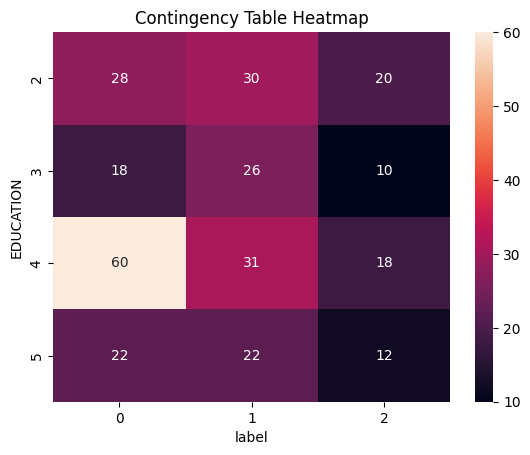

In [346]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the contingency table
sns.heatmap(contingency_table_filtered, annot=True, fmt='d')
plt.title("Contingency Table Heatmap")
plt.show()

### Chi-Square test

In [347]:
# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table_filtered.index, 
                   columns=contingency_table_filtered.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    12.0484
Degrees of Freedom:       6
p-value:                  6.0897e-02

Expected Frequencies (rounded):
label          0      1      2
EDUCATION                     
2          33.62  28.63  15.76
3          23.27  19.82  10.91
4          46.98  40.00  22.02
5          24.13  20.55  11.31


* Result: There is no significant difference between the clusters regarding 'education' - but Very close

### Political leaning

In [348]:
# Create a contingency table
contingency_table = pd.crosstab(data['POLITICAL'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    13.9007
Degrees of Freedom:       8
p-value:                  8.4392e-02

Expected Frequencies (rounded):
label          0      1      2
POLITICAL                     
1          14.24  12.03   6.73
2          43.14  36.45  20.40
3          51.34  43.38  24.28
4          16.39  13.85   7.75
5           3.88   3.28   1.84


* The assumptions about the expected frequency is met. 

In [349]:
# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    13.9007
Degrees of Freedom:       8
p-value:                  8.4392e-02

Expected Frequencies (rounded):
label          0      1      2
POLITICAL                     
1          14.24  12.03   6.73
2          43.14  36.45  20.40
3          51.34  43.38  24.28
4          16.39  13.85   7.75
5           3.88   3.28   1.84


**Result**: The political leaning shows no significant difference between clusters. - but close to the threshold

### Question 4
"How could we increase the use of public transport?"

In [350]:
# convert list to numpy array to make an input to embeddings
emb_4['q4'] = emb_4['q4'].apply(np.array)  
matrix = np.vstack(emb_4['q4'].values)
matrix.shape

(296, 1536)

In [351]:
X = matrix.copy()

## Dimensionality reduction (umap)

In [352]:
# Step 1: Normalize the data
from sklearn.preprocessing import StandardScaler
normalized_embeddings = StandardScaler().fit_transform(X)

In [353]:
# Step 2: Apply UMAP for dimensionality reduction
umap_model = UMAP(n_neighbors=10, min_dist=0.1, n_components=2, random_state = 42)
umap_embeddings = umap_model.fit_transform(normalized_embeddings)
X = umap_embeddings.copy()

/mnt/home/kim/venvs/my_environment/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [354]:
# Step 3: Use silhouette score to find optimal number of clusters
silhouette_scores = []
for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

The last line derives from the fact that silhouette score is calculated from the num_cluster 2, so therefore if retrieving index of the lists, the first element's index is 0 but it indicates the value of num_cluster 2, therefore +2 would make it easier to retrieve the value. 


In [355]:
optimal_num_clusters

2

In [356]:
# Use Elbow-analysis as well to find optimal number of clusters
# Elbow analysis
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(np.sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = np.sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

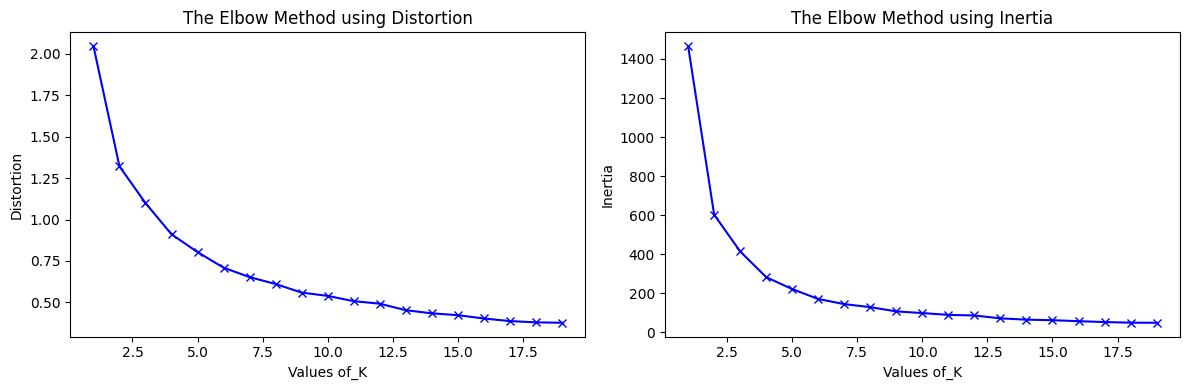

In [357]:
# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # Adjust figsize as needed

# Plot the first plot on ax1
ax1.plot(K, distortions, 'bx-')
ax1.set_xlabel('Values of_K')
ax1.set_ylabel('Distortion')
ax1.set_title('The Elbow Method using Distortion')


# Plot the second plot on ax2
ax2.plot(K, inertias, 'bx-')
ax2.set_xlabel('Values of_K')
ax2.set_ylabel('Inertia')
ax2.set_title('The Elbow Method using Inertia')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

Define the number of clusters for the clustering method combining the result of the graphs and the value of variable optimal_num_clusters

## KMeans clustering

In [358]:
# Step 4: Perform final clustering
final_kmeans = KMeans(n_clusters=2, random_state=0) # random_state fixed to 0, n_cluster changed
final_cluster_labels = final_kmeans.fit_predict(X)

# Save the result of clustering with random state 0 as a dataframe column
emb_4['label'] = final_cluster_labels  

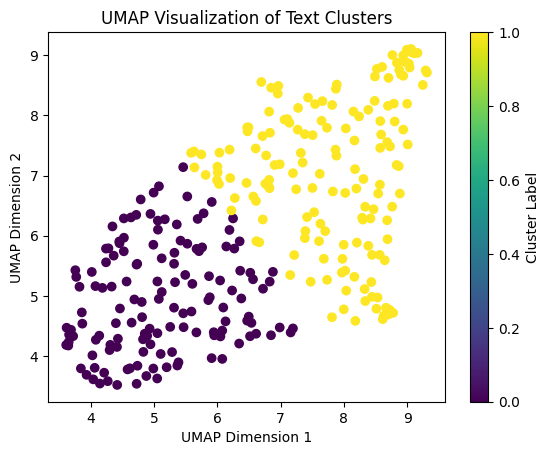

In [359]:
# Visualize clustering depending on different random states.
figures = [] # list to hold different figures. 

fig1, ax1 = plt.subplots()
scatter = ax1.scatter(X[:, 0], X[:, 1], c=final_cluster_labels, cmap='viridis')
ax1.set_xlabel('UMAP Dimension 1')
ax1.set_ylabel('UMAP Dimension 2')
ax1.set_title('UMAP Visualization of Text Clusters')

colorbar = plt.colorbar(scatter, ax=ax1)
colorbar.set_label('Cluster Label')

figures.append(fig1)

In [360]:
# Cluster labels obtained from clustering algorithm

final_cluster_labels # cluster_labels_from_bert
X # contextualized tokens of the input texts.

# Specify the question that is addressed. 
print("\n\"Question 4\"\n")

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, final_cluster_labels)
print(f"Silhouette Coefficient: {silhouette}")

# Calculate Calinski-Harabasz Index
calinski = calinski_harabasz_score(X, final_cluster_labels)
print(f"Calinski-Harabasz Index: {calinski}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, final_cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


"Question 4"

Silhouette Coefficient: 0.48381227254867554
Calinski-Harabasz Index: 420.8697866923912
Davies-Bouldin Index: 0.7682421842431237


## connect to the demographics

In [361]:
result_4 = pd.merge(emb_4, demos, on = 'index')

In [362]:
result_4

,q4,index,label,AGE,GENDER,EDUCATION,EMPLOYMENT,INCOME,POLITICAL,DAT,CRT2
0,"[0.0020402405, -0.0582554439, 0.0885944632, -0...",00278,1,24,1,5,1,3,2,74.104969,3
1,"[1.34043e-05, -0.057239938500000004, 0.1798491...",0068d,0,74,1,2,7,2,4,79.882640,2
2,"[-0.0183782852, -0.10697927880000001, 0.170195...",00f13,0,43,1,4,1,3,3,77.948290,3
3,"[-0.0111257704, -0.10284219780000001, 0.074164...",01cb6,1,56,3,2,8,1,1,78.969095,2
4,"[0.015917086900000002, -0.12745015140000002, 0...",02670,0,25,1,5,1,2,2,83.311323,1
...,...,...,...,...,...,...,...,...,...,...,...
291,"[0.0237050713, -0.0853645131, 0.0856912413, 0....",f92a4,0,35,1,5,1,3,3,65.242337,2
292,"[0.076717227, -0.06395101040000001, 0.19733608...",f9fd8,0,50,1,4,8,2,2,80.076401,1
293,"[0.0097106501, -0.0205362016, 0.2237156965, 0....",fb2a2,1,38,1,2,8,1,3,78.420482,0
294,"[0.0086282553, -0.1250774013, 0.2095274832, -0...",fb9c4,0,21,1,4,8,3,2,83.133171,1


## Hypothesis testing

In [363]:
data = result_4

## ANOVA

### Age

In [372]:
from scipy.stats import levene, f_oneway
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.oneway import anova_oneway

In [373]:
# split the dataset for the analysis

grouped_data = [data['AGE'][data['label'] == cluster] for cluster in data['label'].unique()]

### Levene's Test

In [374]:
# Perform Levene's test
levene_stat, levene_p = levene(*grouped_data)

print(f"Levene's Test Statistic: {levene_stat}")
print(f"P-Value: {levene_p}")

# Check the result of Levene's test
if levene_p > 0.05:
    print("Variances are equal across groups (p > 0.05), you can proceed with ANOVA.\n")
    
    # Perform ANOVA
    anova_stat, anova_p = f_oneway(*grouped_data)
    
    print(f"ANOVA Test Statistic: {anova_stat}")
    print(f"P-Value: {anova_p}")
    
    if anova_p < 0.05:
        print("There is a significant difference in age across clusters (p < 0.05).")
    else:
        print("There is no significant difference in age across clusters (p > 0.05).")
else:
    print("Variances are not equal across groups (p <= 0.05), consider using a different test like Welch's ANOVA.")

Levene's Test Statistic: 0.1170749980823218
P-Value: 0.7324732682029186
Variances are equal across groups (p > 0.05), you can proceed with ANOVA.

ANOVA Test Statistic: 0.11314375359839904
P-Value: 0.736832970145332
There is no significant difference in age across clusters (p > 0.05).


### DAT

In [375]:
# split the dataset for the analysis

grouped_data = [data['DAT'][data['label'] == cluster] for cluster in data['label'].unique()]

### Levene's Test

In [376]:
# Perform Levene's test
levene_stat, levene_p = levene(*grouped_data)

print(f"Levene's Test Statistic: {levene_stat}")
print(f"P-Value: {levene_p}")

# Check the result of Levene's test
if levene_p > 0.05:
    print("Variances are equal across groups (p > 0.05), you can proceed with ANOVA.\n")
    
    # Perform ANOVA
    anova_stat, anova_p = f_oneway(*grouped_data)
    
    print(f"ANOVA Test Statistic: {anova_stat}")
    print(f"P-Value: {anova_p}")
    
    if anova_p < 0.05:
        print("There is a significant difference in dat across clusters (p < 0.05).")
    else:
        print("There is no significant difference in dat across clusters (p > 0.05).")
else:
    print("Variances are not equal across groups (p <= 0.05), consider using a different test like Welch's ANOVA.")

Levene's Test Statistic: 0.3622204163245023
P-Value: 0.5477394812474369
Variances are equal across groups (p > 0.05), you can proceed with ANOVA.

ANOVA Test Statistic: 8.350346741046074
P-Value: 0.004143117420791672
There is a significant difference in dat across clusters (p < 0.05).


### CRT

In [377]:
# split the dataset for the analysis

grouped_data = [data['CRT2'][data['label'] == cluster] for cluster in data['label'].unique()]

### Levene's Test

In [378]:
# Perform Levene's test
levene_stat, levene_p = levene(*grouped_data)

print(f"Levene's Test Statistic: {levene_stat}")
print(f"P-Value: {levene_p}")

# Check the result of Levene's test
if levene_p > 0.05:
    print("Variances are equal across groups (p > 0.05), you can proceed with ANOVA.\n")
    
    # Perform ANOVA
    anova_stat, anova_p = f_oneway(*grouped_data)
    
    print(f"ANOVA Test Statistic: {anova_stat}")
    print(f"P-Value: {anova_p}")
    
    if anova_p < 0.05:
        print("There is a significant difference in crt across clusters (p < 0.05).")
    else:
        print("There is no significant difference in crt across clusters (p > 0.05).")
else:
    print("Variances are not equal across groups (p <= 0.05), consider using a different test like Welch's ANOVA.")

Levene's Test Statistic: 0.2196650184914875
P-Value: 0.639642597143209
Variances are equal across groups (p > 0.05), you can proceed with ANOVA.

ANOVA Test Statistic: 2.2535760823098374
P-Value: 0.13437921744034467
There is no significant difference in crt across clusters (p > 0.05).


In [379]:
# Perform Welch's ANOVA
# anova_oneway method performs Welch's ANOVA when using welch=True
welch_anova = anova_oneway(data['CRT2'], data['label'], use_var='unequal')

# Extract and print the results
print(f"Welch's ANOVA Test Statistic: {welch_anova.statistic}")
print(f"P-Value: {welch_anova.pvalue}")

if welch_anova.pvalue < 0.05:
    print("There is a significant difference in crt across clusters (p < 0.05).")
else:
    print("There is no significant difference in crt across clusters (p > 0.05).")

Welch's ANOVA Test Statistic: 2.2496692232695614
P-Value: 0.1347326806823158
There is no significant difference in crt across clusters (p > 0.05).


## Chi-Square Test
### Check the expected frequency
* It is supposed to be, Every cell > 0, 80% of the cells >= 5

In [380]:
from scipy.stats import chi2_contingency
import statsmodels.api as sm

### Gender

In [381]:
# Create a contingency table
contingency_table = pd.crosstab(data['GENDER'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    1.8076
Degrees of Freedom:       3
p-value:                  6.1329e-01

Expected Frequencies (rounded):
label       0      1
GENDER              
1       71.42  79.58
2        0.47   0.53
3       67.64  75.36
5        0.47   0.53


### Cut off the dataset

In [382]:
contingency_table_filtered = contingency_table.loc[[1, 3]]

In [383]:
# Perform Chi-Square test
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results
print("Expected Frequencies:")
print(expected)

# Check if all expected frequencies are >= 5
if np.all(expected >= 5):
    print("All expected frequencies are >= 5. The Chi-Square test can be used.")
else:
    print("Some expected frequencies are < 5. Check if the cells <5 are more than 20% of the entire cells. Then consider using Fisher's Exact Test or combining categories.")

Expected Frequencies:
[[71.9047619 79.0952381]
 [68.0952381 74.9047619]]
All expected frequencies are >= 5. The Chi-Square test can be used.


In [384]:
# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table_filtered.index, 
                   columns=contingency_table_filtered.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    0.0000
Degrees of Freedom:       1
p-value:                  1.0000e+00

Expected Frequencies (rounded):
label      0     1
GENDER            
1       71.9  79.1
3       68.1  74.9


**Result:** p value is not below 0.05, therefore there is no significant difference in gender by clusters.

### Income

In [385]:
# Create a contingency table
contingency_table = pd.crosstab(data['INCOME'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    4.0532
Degrees of Freedom:       4
p-value:                  3.9885e-01

Expected Frequencies (rounded):
label       0      1
INCOME              
1       34.05  37.95
2       53.92  60.08
3       28.38  31.62
4       18.45  20.55
5        5.20   5.80


**RESULT:** Expected frequency meets the assumptions, so it is valid analysis

* Income shows NO significant difference between the clusters

### Employment -> expected frequency was not good, could not finish.

In [386]:
# Create a contingency table
contingency_table = pd.crosstab(data['EMPLOYMENT'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    4.1327
Degrees of Freedom:       7
p-value:                  7.6438e-01

Expected Frequencies (rounded):
label           0      1
EMPLOYMENT              
1           51.55  57.45
2           18.92  21.08
3            6.15   6.85
4           20.81  23.19
5            7.57   8.43
6            8.04   8.96
7           19.86  22.14
8            7.09   7.91


* Assumption is bit met, but not so valid for the Chi-Square.

### Education

In [387]:
# Create a contingency table
contingency_table = pd.crosstab(data['EDUCATION'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    4.9726
Degrees of Freedom:       4
p-value:                  2.9012e-01

Expected Frequencies (rounded):
label          0      1
EDUCATION              
2          36.89  41.11
3          25.07  27.93
4          51.55  57.45
5          25.54  28.46
6           0.95   1.05


In [388]:
# filter only the 1,2 voted participants
contingency_table_filtered = contingency_table.loc[[2, 3, 4, 5]]

In [389]:
contingency_table_filtered

label,0,1
EDUCATION,,
2,29,49
3,26,27
4,54,55
5,30,24


In [390]:
# Perform Chi-Square test
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results
print("Expected Frequencies:")
print(expected)

# Check if all expected frequencies are >= 5
if np.all(expected >= 5):
    print("All expected frequencies are >= 5. The Chi-Square test can be used.")
else:
    print("Some expected frequencies are < 5. Check if the cells <5 are more than 20% of the entire cells. Then consider using Fisher's Exact Test or combining categories.")

Expected Frequencies:
[[36.87755102 41.12244898]
 [25.05782313 27.94217687]
 [51.53401361 57.46598639]
 [25.53061224 28.46938776]]
All expected frequencies are >= 5. The Chi-Square test can be used.


* Assumption is met regarding the expected frequency

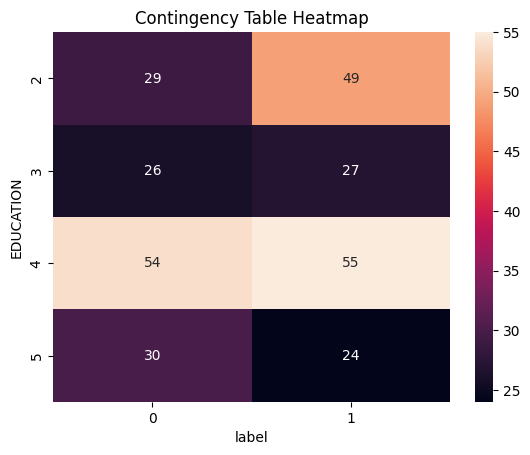

In [391]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the contingency table
sns.heatmap(contingency_table_filtered, annot=True, fmt='d')
plt.title("Contingency Table Heatmap")
plt.show()

### Chi-Square test

In [392]:
# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table_filtered.index, 
                   columns=contingency_table_filtered.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    4.9669
Degrees of Freedom:       3
p-value:                  1.7424e-01

Expected Frequencies (rounded):
label          0      1
EDUCATION              
2          36.88  41.12
3          25.06  27.94
4          51.53  57.47
5          25.53  28.47


* The result: Education shows no significant difference between clusters.

### Political leaning

In [393]:
# Create a contingency table
contingency_table = pd.crosstab(data['POLITICAL'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    3.3830
Degrees of Freedom:       4
p-value:                  4.9589e-01

Expected Frequencies (rounded):
label          0      1
POLITICAL              
1          15.14  16.86
2          46.82  52.18
3          56.28  62.72
4          17.50  19.50
5           4.26   4.74


* The assumptions about the expected frequency is met. 

In [394]:
# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    3.3830
Degrees of Freedom:       4
p-value:                  4.9589e-01

Expected Frequencies (rounded):
label          0      1
POLITICAL              
1          15.14  16.86
2          46.82  52.18
3          56.28  62.72
4          17.50  19.50
5           4.26   4.74


**Result**: The political leaning shows no significant difference between clusters.

### Question 5
"How could we reduce stress in our society?"

In [395]:
# convert list to numpy array to make an input to embeddings
emb_5['q5'] = emb_5['q5'].apply(np.array)  
matrix = np.vstack(emb_5['q5'].values)
matrix.shape

(298, 1536)

In [396]:
X = matrix.copy()

## Dimensionality reduction (umap)

In [397]:
# Step 1: Normalize the data
from sklearn.preprocessing import StandardScaler
normalized_embeddings = StandardScaler().fit_transform(X)

In [398]:
# Step 2: Apply UMAP for dimensionality reduction
umap_model = UMAP(n_neighbors=10, min_dist=0.1, n_components=2, random_state = 42)
umap_embeddings = umap_model.fit_transform(normalized_embeddings)
X = umap_embeddings.copy()

/mnt/home/kim/venvs/my_environment/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [399]:
# Step 3: Use silhouette score to find optimal number of clusters
silhouette_scores = []
for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

The last line derives from the fact that silhouette score is calculated from the num_cluster 2, so therefore if retrieving index of the lists, the first element's index is 0 but it indicates the value of num_cluster 2, therefore +2 would make it easier to retrieve the value. 


In [400]:
optimal_num_clusters

2

In [401]:
# Use Elbow-analysis as well to find optimal number of clusters
# Elbow analysis
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(np.sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = np.sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

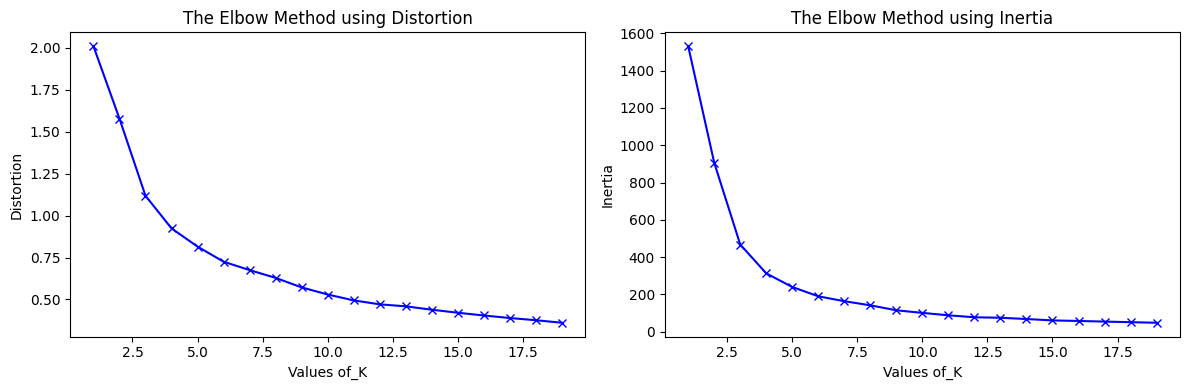

In [402]:
# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # Adjust figsize as needed

# Plot the first plot on ax1
ax1.plot(K, distortions, 'bx-')
ax1.set_xlabel('Values of_K')
ax1.set_ylabel('Distortion')
ax1.set_title('The Elbow Method using Distortion')


# Plot the second plot on ax2
ax2.plot(K, inertias, 'bx-')
ax2.set_xlabel('Values of_K')
ax2.set_ylabel('Inertia')
ax2.set_title('The Elbow Method using Inertia')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

Define the number of clusters for the clustering method combining the result of the graphs and the value of variable optimal_num_clusters

## KMeans clustering

In [406]:
# Step 4: Perform final clustering
final_kmeans = KMeans(n_clusters=2, random_state=0) # random_state fixed to 0, n_cluster changed
final_cluster_labels = final_kmeans.fit_predict(X)

# Save the result of clustering with random state 0 as a dataframe column
emb_5['label'] = final_cluster_labels  

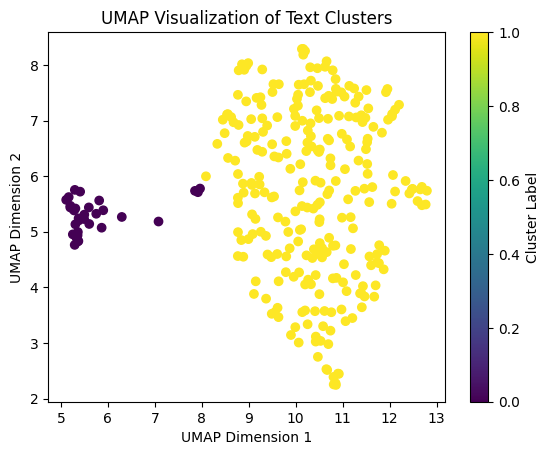

In [407]:
# Visualize clustering depending on different random states.
figures = [] # list to hold different figures. 

fig1, ax1 = plt.subplots()
scatter = ax1.scatter(X[:, 0], X[:, 1], c=final_cluster_labels, cmap='viridis')
ax1.set_xlabel('UMAP Dimension 1')
ax1.set_ylabel('UMAP Dimension 2')
ax1.set_title('UMAP Visualization of Text Clusters')

colorbar = plt.colorbar(scatter, ax=ax1)
colorbar.set_label('Cluster Label')

figures.append(fig1)

In [408]:
# Cluster labels obtained from clustering algorithm

final_cluster_labels # cluster_labels_from_bert
X # contextualized tokens of the input texts.

# Specify the question that is addressed. 
print("\n\"Question 5\"\n")

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, final_cluster_labels)
print(f"Silhouette Coefficient: {silhouette}")

# Calculate Calinski-Harabasz Index
calinski = calinski_harabasz_score(X, final_cluster_labels)
print(f"Calinski-Harabasz Index: {calinski}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, final_cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


"Question 5"

Silhouette Coefficient: 0.5438099503517151
Calinski-Harabasz Index: 204.06869368031045
Davies-Bouldin Index: 0.4977848847954623


In [411]:
result_5 = pd.merge(emb_5, demos, on = 'index')

In [412]:
result_5

,q5,index,label,AGE,GENDER,EDUCATION,EMPLOYMENT,INCOME,POLITICAL,DAT,CRT2
0,"[-0.0001568478, -0.0148218642, 0.2039917894, 0...",00278,1,24,1,5,1,3,2,74.104969,3
1,"[0.040862210600000004, -0.08139459090000001, 0...",0068d,1,74,1,2,7,2,4,79.882640,2
2,"[-0.043576194000000006, -0.0356212229, 0.20218...",00f13,1,43,1,4,1,3,3,77.948290,3
3,"[0.049404923600000004, -0.0011224389, 0.255739...",01cb6,1,56,3,2,8,1,1,78.969095,2
4,"[0.0392522177, -0.059940291300000004, 0.242728...",02670,1,25,1,5,1,2,2,83.311323,1
...,...,...,...,...,...,...,...,...,...,...,...
293,"[-0.020118372500000002, -0.0269152801, 0.24644...",f92a4,1,35,1,5,1,3,3,65.242337,2
294,"[0.0788195238, -0.0492200394, 0.2816434875, 0....",f9fd8,1,50,1,4,8,2,2,80.076401,1
295,"[-0.0100595136, -0.0686657811, 0.1712915935, 0...",fb2a2,1,38,1,2,8,1,3,78.420482,0
296,"[0.0063630654, -0.053776925, 0.2743967529, 0.0...",fb9c4,1,21,1,4,8,3,2,83.133171,1


## Hypothesis testing

In [413]:
data = result_5

## ANOVA

### Age

In [414]:
from scipy.stats import levene, f_oneway
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.oneway import anova_oneway

In [415]:
# split the dataset for the analysis

grouped_data = [data['AGE'][data['label'] == cluster] for cluster in data['label'].unique()]

### Levene's Test

In [416]:
# Perform Levene's test
levene_stat, levene_p = levene(*grouped_data)

print(f"Levene's Test Statistic: {levene_stat}")
print(f"P-Value: {levene_p}")

# Check the result of Levene's test
if levene_p > 0.05:
    print("Variances are equal across groups (p > 0.05), you can proceed with ANOVA.\n")
    
    # Perform ANOVA
    anova_stat, anova_p = f_oneway(*grouped_data)
    
    print(f"ANOVA Test Statistic: {anova_stat}")
    print(f"P-Value: {anova_p}")
    
    if anova_p < 0.05:
        print("There is a significant difference in age across clusters (p < 0.05).")
    else:
        print("There is no significant difference in age across clusters (p > 0.05).")
else:
    print("Variances are not equal across groups (p <= 0.05), consider using a different test like Welch's ANOVA.")

Levene's Test Statistic: 0.0001928802287151367
P-Value: 0.9889285855775894
Variances are equal across groups (p > 0.05), you can proceed with ANOVA.

ANOVA Test Statistic: 0.1745754469992306
P-Value: 0.6763799973956404
There is no significant difference in age across clusters (p > 0.05).


### DAT

In [417]:
# split the dataset for the analysis

grouped_data = [data['DAT'][data['label'] == cluster] for cluster in data['label'].unique()]

### Levene's Test

In [418]:
# Perform Levene's test
levene_stat, levene_p = levene(*grouped_data)

print(f"Levene's Test Statistic: {levene_stat}")
print(f"P-Value: {levene_p}")

# Check the result of Levene's test
if levene_p > 0.05:
    print("Variances are equal across groups (p > 0.05), you can proceed with ANOVA.\n")
    
    # Perform ANOVA
    anova_stat, anova_p = f_oneway(*grouped_data)
    
    print(f"ANOVA Test Statistic: {anova_stat}")
    print(f"P-Value: {anova_p}")
    
    if anova_p < 0.05:
        print("There is a significant difference in age across clusters (p < 0.05).")
    else:
        print("There is no significant difference in age across clusters (p > 0.05).")
else:
    print("Variances are not equal across groups (p <= 0.05), consider using a different test like Welch's ANOVA.")

Levene's Test Statistic: 9.523840813521014
P-Value: 0.0022200754701144714
Variances are not equal across groups (p <= 0.05), consider using a different test like Welch's ANOVA.


In [420]:
# Perform Welch's ANOVA
# anova_oneway method performs Welch's ANOVA when using welch=True
welch_anova = anova_oneway(data['DAT'], data['label'], use_var='unequal')

# Extract and print the results
print(f"Welch's ANOVA Test Statistic: {welch_anova.statistic}")
print(f"P-Value: {welch_anova.pvalue}")

if welch_anova.pvalue < 0.05:
    print("There is a significant difference in dat across clusters (p < 0.05).")
else:
    print("There is no significant difference in dat across clusters (p > 0.05).")

Welch's ANOVA Test Statistic: 3.64755122910413
P-Value: 0.06503862285798741
There is no significant difference in dat across clusters (p > 0.05).


### CRT

In [421]:
# split the dataset for the analysis

grouped_data = [data['CRT2'][data['label'] == cluster] for cluster in data['label'].unique()]

### Levene's Test

In [422]:
# Perform Levene's test
levene_stat, levene_p = levene(*grouped_data)

print(f"Levene's Test Statistic: {levene_stat}")
print(f"P-Value: {levene_p}")

# Check the result of Levene's test
if levene_p > 0.05:
    print("Variances are equal across groups (p > 0.05), you can proceed with ANOVA.\n")
    
    # Perform ANOVA
    anova_stat, anova_p = f_oneway(*grouped_data)
    
    print(f"ANOVA Test Statistic: {anova_stat}")
    print(f"P-Value: {anova_p}")
    
    if anova_p < 0.05:
        print("There is a significant difference in age across clusters (p < 0.05).")
    else:
        print("There is no significant difference in age across clusters (p > 0.05).")
else:
    print("Variances are not equal across groups (p <= 0.05), consider using a different test like Welch's ANOVA.")

Levene's Test Statistic: 3.447014516934252
P-Value: 0.06435954597816256
Variances are equal across groups (p > 0.05), you can proceed with ANOVA.

ANOVA Test Statistic: 3.995731830078519
P-Value: 0.046529768478751204
There is a significant difference in age across clusters (p < 0.05).


In [257]:
# Perform Welch's ANOVA
# anova_oneway method performs Welch's ANOVA when using welch=True
welch_anova = anova_oneway(data['CRT2'], data['label'], use_var='unequal')

# Extract and print the results
print(f"Welch's ANOVA Test Statistic: {welch_anova.statistic}")
print(f"P-Value: {welch_anova.pvalue}")

if welch_anova.pvalue < 0.05:
    print("There is a significant difference in age across clusters (p < 0.05).")
else:
    print("There is no significant difference in age across clusters (p > 0.05).")

Welch's ANOVA Test Statistic: 6.558240460264331
P-Value: 0.011677129405597788
There is a significant difference in age across clusters (p < 0.05).


## Chi-Square Test
### Check the expected frequency
* It is supposed to be, Every cell > 0, 80% of the cells >= 5

In [423]:
from scipy.stats import chi2_contingency
import statsmodels.api as sm

### Gender

In [424]:
# Create a contingency table
contingency_table = pd.crosstab(data['GENDER'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    1.0042
Degrees of Freedom:       3
p-value:                  8.0023e-01

Expected Frequencies (rounded):
label       0       1
GENDER               
1       16.21  134.79
2        0.11    0.89
3       15.57  129.43
5        0.11    0.89


### Cut off the dataset

In [425]:
contingency_table_filtered = contingency_table.loc[[1, 3]]

In [426]:
# Perform Chi-Square test
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results
print("Expected Frequencies:")
print(expected)

# Check if all expected frequencies are >= 5
if np.all(expected >= 5):
    print("All expected frequencies are >= 5. The Chi-Square test can be used.")
else:
    print("Some expected frequencies are < 5. Check if the cells <5 are more than 20% of the entire cells. Then consider using Fisher's Exact Test or combining categories.")

Expected Frequencies:
[[ 16.32432432 134.67567568]
 [ 15.67567568 129.32432432]]
All expected frequencies are >= 5. The Chi-Square test can be used.


In [427]:
# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table_filtered.index, 
                   columns=contingency_table_filtered.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    0.4666
Degrees of Freedom:       1
p-value:                  4.9454e-01

Expected Frequencies (rounded):
label       0       1
GENDER               
1       16.32  134.68
3       15.68  129.32


**Result:** p value is not below 0.05, therefore there is no significant difference in gender by clusters.

### Income

In [428]:
# Create a contingency table
contingency_table = pd.crosstab(data['INCOME'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    11.5256
Degrees of Freedom:       4
p-value:                  2.1251e-02

Expected Frequencies (rounded):
label       0       1
INCOME               
1        7.95   66.05
2       12.13  100.87
3        6.44   53.56
4        4.30   35.70
5        1.18    9.82


**RESULT:** Expected frequency meets the assumptions, so it is valid analysis

* Income shows **significant difference between the clusters**

### Employment -> expected frequency was not good, could not finish.

In [429]:
# Create a contingency table
contingency_table = pd.crosstab(data['EMPLOYMENT'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    4.3428
Degrees of Freedom:       7
p-value:                  7.3956e-01

Expected Frequencies (rounded):
label           0      1
EMPLOYMENT              
1           11.92  99.08
2            4.40  36.60
3            1.40  11.60
4            4.72  39.28
5            1.72  14.28
6            1.72  14.28
7            4.51  37.49
8            1.61  13.39


* Assumption is bit met, but not so valid for the Chi-Square.

### Education

In [430]:
# Create a contingency table
contingency_table = pd.crosstab(data['EDUCATION'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    3.0167
Degrees of Freedom:       4
p-value:                  5.5504e-01

Expected Frequencies (rounded):
label          0      1
EDUCATION              
2           8.27  68.73
3           5.80  48.20
4          11.60  96.40
5           6.12  50.88
6           0.21   1.79


In [431]:
# filter only the 1,2 voted participants
contingency_table_filtered = contingency_table.loc[[2, 3, 4, 5]]

In [432]:
contingency_table_filtered

label,0,1
EDUCATION,,
2,12,65
3,6,48
4,9,99
5,5,52


In [433]:
# Perform Chi-Square test
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results
print("Expected Frequencies:")
print(expected)

# Check if all expected frequencies are >= 5
if np.all(expected >= 5):
    print("All expected frequencies are >= 5. The Chi-Square test can be used.")
else:
    print("Some expected frequencies are < 5. Check if the cells <5 are more than 20% of the entire cells. Then consider using Fisher's Exact Test or combining categories.")

Expected Frequencies:
[[ 8.32432432 68.67567568]
 [ 5.83783784 48.16216216]
 [11.67567568 96.32432432]
 [ 6.16216216 50.83783784]]
All expected frequencies are >= 5. The Chi-Square test can be used.


* Assumption is met regarding the expected frequency

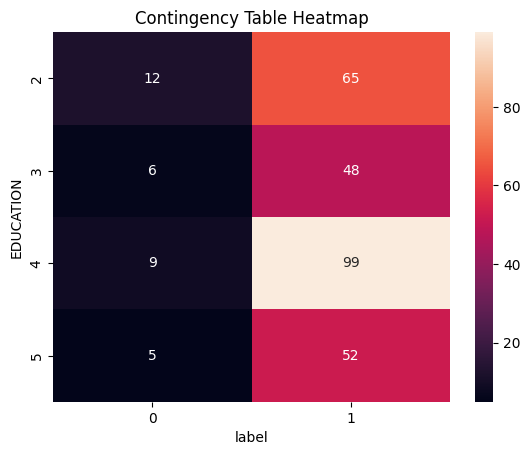

In [434]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the contingency table
sns.heatmap(contingency_table_filtered, annot=True, fmt='d')
plt.title("Contingency Table Heatmap")
plt.show()

### Chi-Square test

In [435]:
# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table_filtered.index, 
                   columns=contingency_table_filtered.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    2.7581
Degrees of Freedom:       3
p-value:                  4.3045e-01

Expected Frequencies (rounded):
label          0      1
EDUCATION              
2           8.32  68.68
3           5.84  48.16
4          11.68  96.32
5           6.16  50.84


* The result shows the education shows no significant difference between the clusters. 

### Political leaning

In [436]:
# Create a contingency table
contingency_table = pd.crosstab(data['POLITICAL'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    3.1355
Degrees of Freedom:       4
p-value:                  5.3540e-01

Expected Frequencies (rounded):
label          0       1
POLITICAL               
1           3.44   28.56
2          10.74   89.26
3          12.78  106.22
4           4.08   33.92
5           0.97    8.03


* The assumptions about the expected frequency is met. 

In [437]:
# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    3.1355
Degrees of Freedom:       4
p-value:                  5.3540e-01

Expected Frequencies (rounded):
label          0       1
POLITICAL               
1           3.44   28.56
2          10.74   89.26
3          12.78  106.22
4           4.08   33.92
5           0.97    8.03


**Result**: The political leaning shows no significant difference between clusters.

## Analysis across the questions

In [438]:
emb_1.head(3)

,q1,index,label
0,"[-0.0294491792, -0.047710513100000004, 0.21808...",00278,5
1,"[0.018888133300000002, -0.0616387874, 0.171511...",0068d,5
2,"[0.0328847421, -0.0337260091, 0.20334434880000...",00f13,6


In [439]:
embs = pd.concat([emb_1.set_index('index'), 
                  emb_2.set_index('index'), 
                  emb_3.set_index('index'), 
                  emb_4.set_index('index'), 
                  emb_5.set_index('index')], 
                  axis = 1, join = 'inner')
embs

,q1,label,q2,label,q3,label,q4,label,q5,label
index,,,,,,,,,,
00278,"[-0.0294491792, -0.047710513100000004, 0.21808...",5,"[0.0918020925, -0.0109149959, 0.1833420191, 0....",2,"[0.1661505885, -0.030773467500000002, 0.204519...",1,"[0.0020402405, -0.0582554439, 0.0885944632, -0...",1,"[-0.0001568478, -0.0148218642, 0.2039917894, 0...",1
0068d,"[0.018888133300000002, -0.0616387874, 0.171511...",5,"[0.0832927702, -0.009694383, 0.2658800595, 0.0...",1,"[0.0398899834, -0.029845013700000003, 0.225772...",2,"[1.34043e-05, -0.057239938500000004, 0.1798491...",0,"[0.040862210600000004, -0.08139459090000001, 0...",1
00f13,"[0.0328847421, -0.0337260091, 0.20334434880000...",6,"[0.0394748142, 0.0023149154, 0.2393497447, 0.0...",2,"[0.1003923068, -0.0289152393, 0.24407228920000...",0,"[-0.0183782852, -0.10697927880000001, 0.170195...",0,"[-0.043576194000000006, -0.0356212229, 0.20218...",1
01cb6,"[-0.042097603000000004, -0.0094608217, 0.21692...",3,"[-0.0021283467, -0.0372710206, 0.2095754072, 0...",2,"[0.0314693609, -0.0571225416, 0.3008553348, 0....",1,"[-0.0111257704, -0.10284219780000001, 0.074164...",1,"[0.049404923600000004, -0.0011224389, 0.255739...",1
02670,"[0.0103939993, -0.046226321300000005, 0.175308...",6,"[0.0556098717, -0.0195356798, 0.1855096575, 0....",2,"[0.1300005894, -0.096013552, 0.2421013229, 0.1...",0,"[0.015917086900000002, -0.12745015140000002, 0...",0,"[0.0392522177, -0.059940291300000004, 0.242728...",1
...,...,...,...,...,...,...,...,...,...,...
f92a4,"[0.0256816596, -0.011286425400000001, 0.160009...",3,"[0.047979642, -0.0532892847, 0.201525289600000...",1,"[0.0529920389, -0.0187411843, 0.17638164010000...",2,"[0.0237050713, -0.0853645131, 0.0856912413, 0....",0,"[-0.020118372500000002, -0.0269152801, 0.24644...",1
f9fd8,"[0.0003793323, -0.0353918606, 0.2978786118, 0....",3,"[0.0246761884, 0.028847442900000003, 0.1663649...",0,"[0.08338780030000001, -0.0451844858, 0.2833924...",1,"[0.076717227, -0.06395101040000001, 0.19733608...",0,"[0.0788195238, -0.0492200394, 0.2816434875, 0....",1
fb2a2,"[0.0054284672, -0.068418537, 0.1615336072, 0.0...",3,"[0.021872717, -0.0064260669, 0.111354785000000...",0,"[0.08418761550000001, -0.010727523400000001, 0...",1,"[0.0097106501, -0.0205362016, 0.2237156965, 0....",1,"[-0.0100595136, -0.0686657811, 0.1712915935, 0...",1


## Losing indices 
Why only 290 left? Because the dataframes miss different participants. So it gets reduced to more than the maximum missing number of each dataframe.

### Flatten the vector across the questions

In [440]:
embs_whole = embs.copy()
embs = embs[['q1', 'q2', 'q3','q4', 'q5']]

In [441]:
embs_flat = embs.apply(lambda x: np.sum(x, axis=0), axis=1)

In [442]:
embs_flat

index
00278    [0.23038689450000002, -0.16247628460000002, 0....
0068d    [0.1829465018, -0.23981271350000002, 0.9929628...
00f13    [0.11079738389999999, -0.2029268347, 1.0591456...
01cb6    [0.025522564400000003, -0.20781902060000002, 1...
02670    [0.251173765, -0.3491659958000001, 0.961515151...
                               ...                        
f92a4    [0.1302400393, -0.19559668759999999, 0.8700572...
f9fd8    [0.2639800718, -0.1648999533, 1.2266155816, 0....
fb2a2    [0.1111399362, -0.17477410999999998, 0.8738365...
fb9c4    [0.16789760880000001, -0.3034409722, 1.0970366...
ff2bf    [0.10214556400000001, -0.21480189950000003, 0....
Length: 290, dtype: object

In [443]:
# convert list to numpy array to make an input to embeddings
embs_flat = embs_flat.apply(np.array)  
matrix = np.vstack(embs_flat.values)
matrix.shape

(290, 1536)

In [444]:
X = matrix.copy()

## Dimensionality reduction (umap)

In [445]:
# Step 1: Normalize the data
from sklearn.preprocessing import StandardScaler
normalized_embeddings = StandardScaler().fit_transform(X)

In [446]:
# Step 2: Apply UMAP for dimensionality reduction
umap_model = UMAP(n_neighbors=10, min_dist=0.1, n_components=2, random_state = 42)
umap_embeddings = umap_model.fit_transform(normalized_embeddings)
X = umap_embeddings.copy()

/mnt/home/kim/venvs/my_environment/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [447]:
# Step 3: Use silhouette score to find optimal number of clusters
silhouette_scores = []
for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

The last line derives from the fact that silhouette score is calculated from the num_cluster 2, so therefore if retrieving index of the lists, the first element's index is 0 but it indicates the value of num_cluster 2, therefore +2 would make it easier to retrieve the value. 


In [448]:
optimal_num_clusters

2

In [449]:
# Use Elbow-analysis as well to find optimal number of clusters
# Elbow analysis
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(np.sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = np.sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

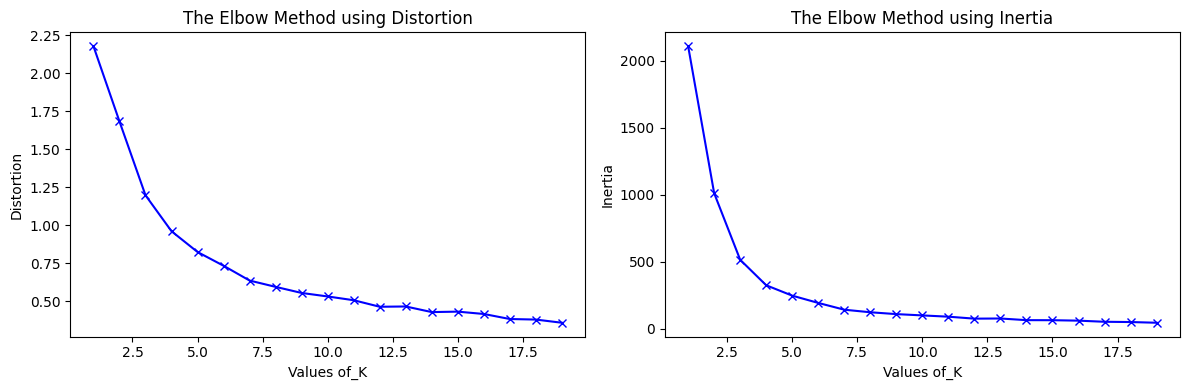

In [450]:
# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # Adjust figsize as needed

# Plot the first plot on ax1
ax1.plot(K, distortions, 'bx-')
ax1.set_xlabel('Values of_K')
ax1.set_ylabel('Distortion')
ax1.set_title('The Elbow Method using Distortion')


# Plot the second plot on ax2
ax2.plot(K, inertias, 'bx-')
ax2.set_xlabel('Values of_K')
ax2.set_ylabel('Inertia')
ax2.set_title('The Elbow Method using Inertia')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

Define the number of clusters for the clustering method combining the result of the graphs and the value of variable optimal_num_clusters

## KMeans clustering

In [451]:
# Step 4: Perform final clustering
final_kmeans = KMeans(n_clusters=2, random_state=0) # random_state fixed to 0, n_cluster changed
final_cluster_labels = final_kmeans.fit_predict(X)

# Save the result of clustering with random state 0 as a dataframe column
embs_flat['label'] = final_cluster_labels  

In [452]:
embs_flat

index
00278    [0.23038689450000002, -0.16247628460000002, 0....
0068d    [0.1829465018, -0.23981271350000002, 0.9929628...
00f13    [0.11079738389999999, -0.2029268347, 1.0591456...
01cb6    [0.025522564400000003, -0.20781902060000002, 1...
02670    [0.251173765, -0.3491659958000001, 0.961515151...
                               ...                        
f9fd8    [0.2639800718, -0.1648999533, 1.2266155816, 0....
fb2a2    [0.1111399362, -0.17477410999999998, 0.8738365...
fb9c4    [0.16789760880000001, -0.3034409722, 1.0970366...
ff2bf    [0.10214556400000001, -0.21480189950000003, 0....
label    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...
Length: 291, dtype: object

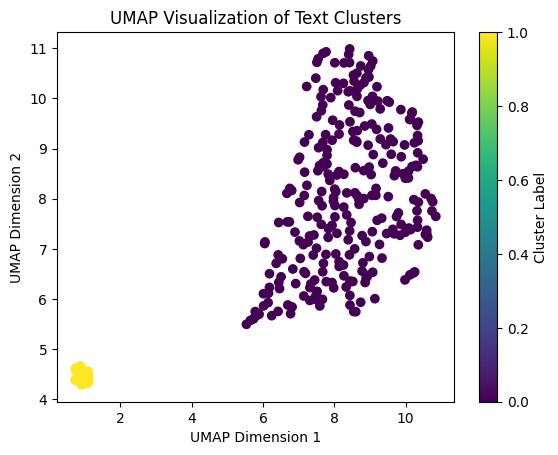

In [453]:
# Visualize clustering depending on different random states.
figures = [] # list to hold different figures. 

fig1, ax1 = plt.subplots()
scatter = ax1.scatter(X[:, 0], X[:, 1], c=final_cluster_labels, cmap='viridis')
ax1.set_xlabel('UMAP Dimension 1')
ax1.set_ylabel('UMAP Dimension 2')
ax1.set_title('UMAP Visualization of Text Clusters')

colorbar = plt.colorbar(scatter, ax=ax1)
colorbar.set_label('Cluster Label')

figures.append(fig1)

In [454]:
# Cluster labels obtained from clustering algorithm

final_cluster_labels # cluster_labels_from_bert
X # contextualized tokens of the input texts.

# Specify the question that is addressed. 
print("\n\"Across the questions\"\n")

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, final_cluster_labels)
print(f"Silhouette Coefficient: {silhouette}")

# Calculate Calinski-Harabasz Index
calinski = calinski_harabasz_score(X, final_cluster_labels)
print(f"Calinski-Harabasz Index: {calinski}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, final_cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


"Across the questions"

Silhouette Coefficient: 0.7113671898841858
Calinski-Harabasz Index: 312.3811573099423
Davies-Bouldin Index: 0.2350710526865356


**Result of the analysis across the questions**
* Data: vector flattened with mean
1. Clustering sparse between.

**Improvement**
1. Use different flattening method or change the approach 

## DataFrame about each participant_id and cluster_label by question

### Participants and cluster labels

In [383]:
embs = embs_whole.copy()

In [384]:
# rename the column, drop unnecessary columns
embs.columns = ['q1_emb', 'q1', 'q2_emb', 'q2', 'q3_emb', 'q3', 'q4_emb', 'q4', 'q5_emb', 'q5']
embs = embs.drop(['q1_emb', 'q2_emb', 'q3_emb', 'q4_emb', 'q5_emb'], axis = 1)
embs

,q1,q2,q3,q4,q5
index,,,,,
00278,1,2,0,1,0
0068d,0,1,2,1,3
00f13,1,1,2,0,3
01cb6,0,2,0,1,4
02670,1,1,1,1,2
...,...,...,...,...,...
f92a4,0,2,0,1,4
f9fd8,0,1,0,0,2
fb2a2,0,0,2,1,4


In [385]:
# sorted(embs.index.to_list())

The dataframe shows the cluster label that the participant possesses for each question. 

In [386]:
# Save the dataframe to csv file
import os 
os.makedirs('/mnt/home/kim/thesis/data/processed_data', exist_ok=True)
embs.to_csv('~/thesis/data/processed_data/knowledge_participants-labels.csv')  

### Adjacency matrix

In [387]:
# Function to create an adjacency matrix
import numpy as np 

def create_adjacency_matrix(df):
    num_participants = len(df.index)
    adjacency_matrix = np.zeros((num_participants, num_participants), dtype=int)

    for i, participant1 in enumerate(df.index):
        for j, participant2 in enumerate(df.index):
            common_clusters = (df.loc[participant1] == df.loc[participant2]).sum()
            adjacency_matrix[i, j] = common_clusters

    return pd.DataFrame(adjacency_matrix, index=df.index, columns=df.index)

adjacency_matrix = create_adjacency_matrix(embs)
print(adjacency_matrix)

index  00278  0068d  00f13  01cb6  02670  06419  07089  08238  0a0eb  0ac65  \
index                                                                         
00278      5      1      1      3      2      2      2      1      1      2   
0068d      1      5      3      2      2      4      4      2      3      2   
00f13      1      3      5      0      2      2      2      2      3      0   
01cb6      3      2      0      5      1      3      2      2      2      4   
02670      2      2      2      1      5      1      2      0      0      1   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
f92a4      3      2      0      5      1      3      2      2      2      4   
f9fd8      1      2      2      2      2      1      2      2      2      2   
fb2a2      1      3      1      3      1      3      3      2      2      4   
fb9c4      1      2      4      1      2      1      2      2      2      1   
ff2bf      2      2      2      1      2      2     

In [388]:
# Save the adjancency matrix to the csv file.
adjacency_matrix.to_csv('~/thesis/data/processed_data/knowledge-adjacency_matrix.csv')  

### NetworkX - adjacency matrix to graph -> "on hold"

In [389]:
import networkx as nx

In [390]:
ad = pd.read_csv('~/thesis/data/processed_data/knowledge-adjacency_matrix.csv', index_col = 0)

In [391]:
ad

,00278,0068d,00f13,01cb6,02670,06419,07089,08238,0a0eb,0ac65,...,f4bc7,f4fb5,f6145,f8e64,f9101,f92a4,f9fd8,fb2a2,fb9c4,ff2bf
index,,,,,,,,,,,,,,,,,,,,,
00278,5,1,1,3,2,2,2,1,1,2,...,2,3,3,3,2,3,1,1,1,2
0068d,1,5,3,2,2,4,4,2,3,2,...,2,3,2,2,2,2,2,3,2,2
00f13,1,3,5,0,2,2,2,2,3,0,...,4,3,2,0,0,0,2,1,4,2
01cb6,3,2,0,5,1,3,2,2,2,4,...,1,1,1,5,3,5,2,3,1,1
02670,2,2,2,1,5,1,2,0,0,1,...,1,3,2,1,2,1,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f92a4,3,2,0,5,1,3,2,2,2,4,...,1,1,1,5,3,5,2,3,1,1
f9fd8,1,2,2,2,2,1,2,2,2,2,...,1,1,0,2,1,2,5,1,2,0
fb2a2,1,3,1,3,1,3,3,2,2,4,...,1,2,3,3,2,3,1,5,2,3


In [392]:
G = nx.Graph()

for row, col in ad.iterrows():
    for node, weight in col.items():
        if weight != 0:
            G.add_edge(row, node, weight=weight)


In [393]:
# pos = nx.kamada_kawai_layout(G)  # Position nodes using a spring layout (you can choose other layout methods)

# nx.draw(G, pos, with_labels=True, node_size=10, node_color='skyblue', font_size=5, font_color='black', font_weight='bold')

# edge_labels = {(edge[0], edge[1]): edge[2]['weight'] for edge in G.edges(data=True)}

# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=5)

# plt.title("Your Graph")
# plt.show()


## Detect Communities
### Louvain method

The Louvain method for community detection is a method to extract non-overlapping communities from large networks. The method is a greedy optimization method that appears to run in time O(n * log n) where n is the number of nodes in the network.

In [394]:
import community # This is python-louvain library
from networkx.algorithms.community import greedy_modularity_communities

In [395]:
G = nx.Graph(adjacency_matrix)

partition = nx.community.louvain_communities(G, seed = 0) # setting the random_state to 0 to deter it changes in repetition

# Create a dictionary with the value of empty list. 
keys = [i for i in range(len(partition))]
communities = {key: [] for key in keys}

num = 0
for part in partition:
    communities[num] = part
    num += 1

In [396]:
# how many communities there are? 
len(communities)

3

In [397]:
len(communities[0])

163

In [398]:
len(communities[1])

124

In [399]:
len(communities[2])

3

### Idea community detection

1) Plot the histogram of the demographic traits for each community and visually compare them 
2) Calculate the median of the numerical variables

### Variable interpretation
Refer to the file from the gitlab 'Variable_coding'

https://arc-git.mpib-berlin.mpg.de/poltools/knowledge_exploration/study_1/-/blob/dev/Variable_coding?ref_type=heads

### Demographic variables calling

In [400]:
# call the original data again
df = pd.read_csv('~/knowledge-explore/data/processed_data/reference_dataset_v1.csv')

In [401]:
df.head(3)

,Unnamed: 0,problem_id,participant_id,DAT,CRT2,CURIOSITY_SCORE,AGE,GENDER,EDUCATION,EMPLOYMENT,...,POLITICAL,CLIMATE,COVID,NEWS,MEDIA,RELATION_KNOWLEDGE,RELATION_INTEREST,RELATION_CONCERN,ideas,emb_ideas
0,0,Q1,00278,74.104969,3,4.229167,24,1,5,1,...,2,1,1,4,5,2,4,4,"['vaccination schemes in these areas', 'increa...","[[-0.011656875722110271, -0.019422005861997604..."
1,1,Q2,00278,74.104969,3,4.229167,24,1,5,1,...,2,1,1,4,5,3,5,5,['equal pay for women and men in the same role...,"[[-0.0034376916009932756, 0.006209875456988811..."
2,2,Q3,00278,74.104969,3,4.229167,24,1,5,1,...,2,1,1,4,5,3,5,5,"['look into conservation plans ', 'ensure poac...","[[0.03516001999378204, -0.004544570576399565, ..."


In [402]:
df = df.rename(columns = {'participant_id': 'PARTICIPANT_ID'})
df = df.set_index('PARTICIPANT_ID')

In [403]:
demos = df[['AGE', 'GENDER', 'EDUCATION', 'EMPLOYMENT', 'INCOME', 'POLITICAL', 'DAT', 'CRT2']]

In [404]:
# Check for duplicate indices
duplicates = demos.index.duplicated()

# keep only the first occurrence of each participant_id (remove duplicates)
demos.drop_duplicates(keep='first', inplace=True)

# Display the modified DataFrame
print("\nDataFrame with unique participant_id:")
print(demos)


DataFrame with unique participant_id:
                AGE  GENDER  EDUCATION  EMPLOYMENT  INCOME  POLITICAL  \
PARTICIPANT_ID                                                          
00278            24       1          5           1       3          2   
0068d            74       1          2           7       2          4   
00f13            43       1          4           1       3          3   
01cb6            56       3          2           8       1          1   
02670            25       1          5           1       2          2   
...             ...     ...        ...         ...     ...        ...   
f92a4            35       1          5           1       3          3   
f9fd8            50       1          4           8       2          2   
fb2a2            38       1          2           8       1          3   
fb9c4            21       1          4           8       3          2   
ff2bf            67       1          2           7       2          4   

           

/tmp/ipykernel_2834494/256376826.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demos.drop_duplicates(keep='first', inplace=True)


### Age

In [405]:
age = demos['AGE']

In [406]:
# delete the null valued rows in the column 'age'
age = age.dropna()

In [407]:
# mean, var, std
print("mean of age:", np.mean(age))
print("variance of age:", np.var(age))
print("standard deviation of age:", np.std(age))

mean of age: 45.86666666666667
variance of age: 244.02888888888884
standard deviation of age: 15.621424035243678


In [408]:
# Dataframe age with each communities
age_0 = age.loc[list(communities[0])]
age_1 = age.loc[list(communities[1])]
age_2 = age.loc[list(communities[2])]

# print cardinality, mean, var, std within the cluster.
# community_0
print("*community_0 in age")
print("how many:", len(age_0))
print("mean:", np.mean(age_0))
print("variance:", np.var(age_0))
print("std:", np.std(age_0))

# community_1
print("\n*community_1 in age ")
print("how many:", len(age_1))
print("mean:", np.mean(age_1))
print("variance:", np.var(age_1))
print("std:", np.std(age_1))

# community_2
print("\n*community_2 in age ")
print("how many:", len(age_2))
print("mean:", np.mean(age_2))
print("variance:", np.var(age_2))
print("std:", np.std(age_2))


*community_0 in age
how many: 163
mean: 44.42944785276074
variance: 237.4597463209003
std: 15.4097289502736

*community_1 in age 
how many: 124
mean: 47.814516129032256
variance: 245.00591831425595
std: 15.65266489497095

*community_2 in age 
how many: 3
mean: 46.666666666666664
variance: 118.22222222222221
std: 10.873004286866726


(array([ 8.,  6., 10., 10.,  5.,  3.,  5.,  7.,  5.,  6.,  7.,  2.,  7.,
         5.,  5.,  4.,  7.,  3.,  5.,  3.,  8., 11.,  5.,  6.,  9.,  4.,
         0.,  6.,  0.,  1.]),
 array([20.        , 21.83333333, 23.66666667, 25.5       , 27.33333333,
        29.16666667, 31.        , 32.83333333, 34.66666667, 36.5       ,
        38.33333333, 40.16666667, 42.        , 43.83333333, 45.66666667,
        47.5       , 49.33333333, 51.16666667, 53.        , 54.83333333,
        56.66666667, 58.5       , 60.33333333, 62.16666667, 64.        ,
        65.83333333, 67.66666667, 69.5       , 71.33333333, 73.16666667,
        75.        ]),
 <BarContainer object of 30 artists>)

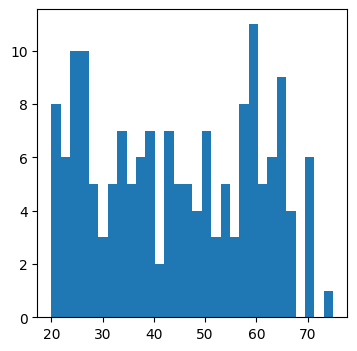

In [409]:
# it is the example below, use to see another community as well.
# Histogram of age in community 0
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(age_0, bins = 30)

### Gender

In [410]:
gender = demos['GENDER']
gender = gender.dropna()
gender

PARTICIPANT_ID
00278    1
0068d    1
00f13    1
01cb6    3
02670    1
        ..
f92a4    1
f9fd8    1
fb2a2    1
fb9c4    1
ff2bf    1
Name: GENDER, Length: 300, dtype: int64

In [411]:
# Dataframe gender with each communities
gender_0 = gender.loc[list(communities[0])]
gender_1 = gender.loc[list(communities[1])]
gender_2 = gender.loc[list(communities[2])]

print("How many in gender belong to community 0:", len(gender_0))
print("How many in gender belong to community 1:", len(gender_1))
print("How many in gender belong to community 2:", len(gender_2))

How many in gender belong to community 0: 163
How many in gender belong to community 1: 124
How many in gender belong to community 2: 3


(array([81.,  0.,  0.,  0.,  0.,  0.,  0., 82.]),
 array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ]),
 <BarContainer object of 8 artists>)

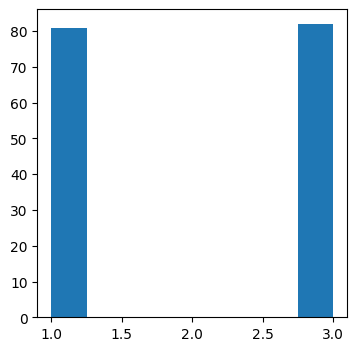

In [412]:
# it is the example below, use to see another community as well.
# Histogram of gender in community 0
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(gender_0, bins = 8)

(array([66.,  0.,  1.,  0., 56.,  0.,  0.,  1.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 8 artists>)

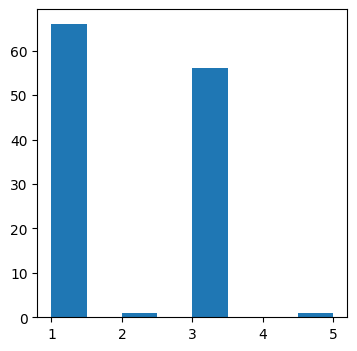

In [413]:
# it is the example below, use to see another community as well.
# Histogram of gender in community 1
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(gender_1, bins = 8)

(array([1., 0., 0., 0., 0., 0., 0., 2.]),
 array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ]),
 <BarContainer object of 8 artists>)

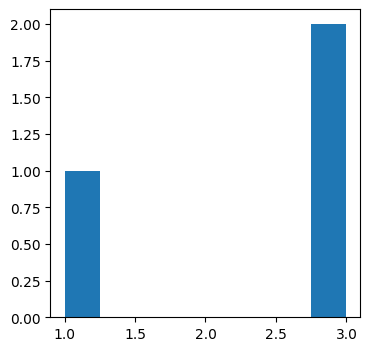

In [414]:
# it is the example below, use to see another community as well.
# Histogram of gender in community 2
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(gender_2, bins = 8)

### Ideology political

In [415]:
politics = demos['POLITICAL']
politics = politics.dropna()
politics

PARTICIPANT_ID
00278    2
0068d    4
00f13    3
01cb6    1
02670    2
        ..
f92a4    3
f9fd8    2
fb2a2    3
fb9c4    2
ff2bf    4
Name: POLITICAL, Length: 300, dtype: int64

In [416]:
# Dataframe political ideology with each communities
politics_0 = politics.loc[list(communities[0])]
politics_1 = politics.loc[list(communities[1])]
politics_2 = politics.loc[list(communities[2])]

print("How many in politics belong to community 0:", len(politics_0))
print("How many in politics belong to community 1:", len(politics_1))
print("How many in politics belong to community 2:", len(politics_2))

How many in politics belong to community 0: 163
How many in politics belong to community 1: 124
How many in politics belong to community 2: 3


(array([17.,  0., 61.,  0., 64.,  0., 16.,  5.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 8 artists>)

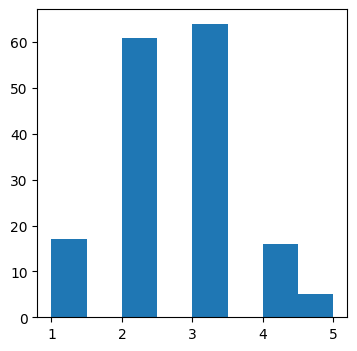

In [417]:
# it is the example below, use to see another community as well.
# Histogram of politics in community 0
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(politics_0, bins = 8)

(array([13.,  0., 35.,  0., 53.,  0., 20.,  3.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 8 artists>)

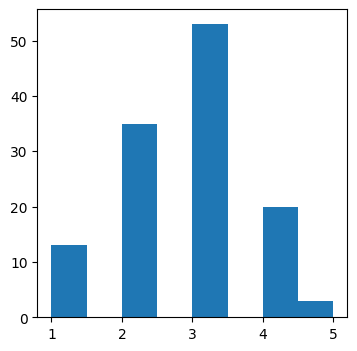

In [418]:
# it is the example below, use to see another community as well.
# Histogram of politics in community 1
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(politics_1, bins = 8)

(array([1., 0., 1., 0., 0., 0., 0., 1.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 8 artists>)

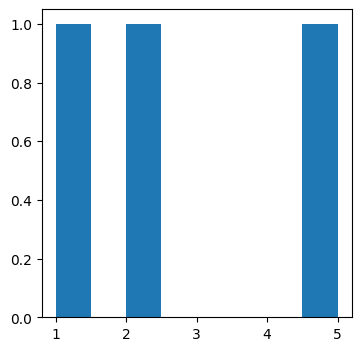

In [419]:
# it is the example below, use to see another community as well.
# Histogram of politics in community 2
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(politics_2, bins = 8)

### Education 

In [239]:
demos.columns.tolist()

['AGE',
 'GENDER',
 'EDUCATION',
 'EMPLOYMENT',
 'INCOME',
 'POLITICAL',
 'DAT',
 'CRT2']

In [240]:
education = demos['EDUCATION']

In [241]:
education = education.dropna()
education

PARTICIPANT_ID
00278    5
0068d    2
00f13    4
01cb6    2
02670    5
        ..
f92a4    5
f9fd8    4
fb2a2    2
fb9c4    4
ff2bf    2
Name: EDUCATION, Length: 300, dtype: int64

In [242]:
# Dataframe political ideology with each communities
education_0 = education.loc[list(communities[0])]
education_1 = education.loc[list(communities[1])]
education_2 = education.loc[list(communities[2])]

print("How many in education belong to community 0:", len(education_0))
print("How many in education belong to community 1:", len(education_1))
print("How many in education belong to community 2:", len(education_2))


How many in education belong to community 0: 163
How many in education belong to community 1: 124
How many in education belong to community 2: 3


(array([32.,  0., 26.,  0., 72.,  0., 31.,  2.]),
 array([2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 8 artists>)

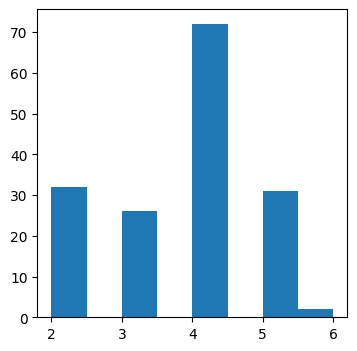

In [243]:
# it is the example below, use to see another community as well.
# Histogram of education in community 0
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(education_0, bins = 8)

### Employment

In [244]:
demos['EMPLOYMENT']

PARTICIPANT_ID
00278    1
0068d    7
00f13    1
01cb6    8
02670    1
        ..
f92a4    1
f9fd8    8
fb2a2    8
fb9c4    8
ff2bf    7
Name: EMPLOYMENT, Length: 300, dtype: int64

In [245]:
employment = demos['EMPLOYMENT'].dropna()
employment

PARTICIPANT_ID
00278    1
0068d    7
00f13    1
01cb6    8
02670    1
        ..
f92a4    1
f9fd8    8
fb2a2    8
fb9c4    8
ff2bf    7
Name: EMPLOYMENT, Length: 300, dtype: int64

In [246]:
# Dataframe political ideology with each communities
employment_0 = employment.loc[list(communities[0])]
employment_1 = employment.loc[list(communities[1])]
employment_2 = employment.loc[list(communities[2])]

print("How many in employment belong to community 0:", len(employment_0))
print("How many in employment belong to community 1:", len(employment_1))
print("How many in employment belong to community 2:", len(employment_2))


How many in employment belong to community 0: 163
How many in employment belong to community 1: 124
How many in employment belong to community 2: 3


(array([66., 24.,  7.,  0., 23.,  7.,  0.,  8., 19.,  9.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

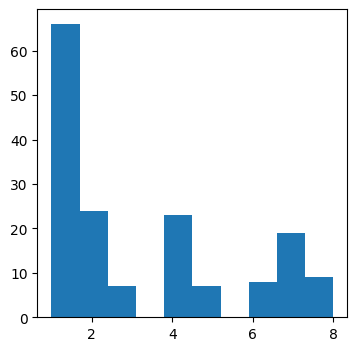

In [247]:
# it is the example below, use to see another community as well.
# Histogram of employment in community 0
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(employment_0, bins = 10)

### Income

In [248]:
income = demos['INCOME'].dropna()

In [249]:
# Dataframe political ideology with each communities
income_0 = income.loc[list(communities[0])]
income_1 = income.loc[list(communities[1])]
income_2 = income.loc[list(communities[2])]

print("How many in income belong to community 0:", len(income_0))
print("How many in income belong to community 1:", len(income_1))
print("How many in income belong to community 2:", len(income_2))


How many in income belong to community 0: 163
How many in income belong to community 1: 124
How many in income belong to community 2: 3


(array([40.,  0., 58.,  0., 29.,  0., 29.,  7.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 8 artists>)

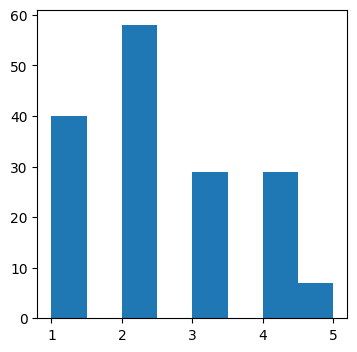

In [250]:
# it is the example below, use to see another community as well.
# Histogram of income in community 0
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(income_0, bins = 8)

### DAT - how divergent the participant can think

In [251]:
dat = demos['DAT'].dropna()

In [252]:
# Dataframe political ideology with each communities
dat_0 = dat.loc[list(communities[0])]
dat_1 = dat.loc[list(communities[1])]
dat_2 = dat.loc[list(communities[2])]

print("How many in DAT belong to community 0:", len(dat_0))
print("How many in DAT belong to community 1:", len(dat_1))
print("How many in DAT belong to community 2:", len(dat_2))


How many in DAT belong to community 0: 163
How many in DAT belong to community 1: 124
How many in DAT belong to community 2: 3


(array([ 1.,  0.,  0.,  0.,  1., 14., 84., 63.]),
 array([ 0.        , 11.67531028, 23.35062055, 35.02593083, 46.70124111,
        58.37655139, 70.05186166, 81.72717194, 93.40248222]),
 <BarContainer object of 8 artists>)

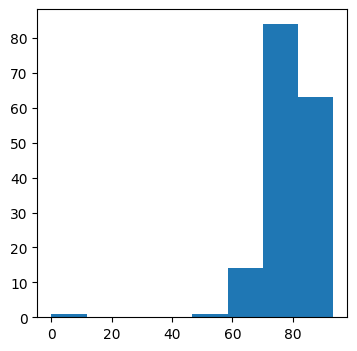

In [253]:
# it is the example below, use to see another community as well.
# Histogram of DAT in community 0
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(dat_0, bins = 8)

### CRT - how creative the participant can think

In [254]:
crt = demos['CRT2'].dropna()

In [255]:
# Dataframe political ideology with each communities
crt_0 = crt.loc[list(communities[0])]
crt_1 = crt.loc[list(communities[1])]
crt_2 = crt.loc[list(communities[2])]

print("How many in CRT belong to community 0:", len(crt_0))
print("How many in CRT belong to community 1:", len(crt_1))
print("How many in CRT belong to community 2:", len(crt_2))


How many in CRT belong to community 0: 163
How many in CRT belong to community 1: 124
How many in CRT belong to community 2: 3


(array([ 9.,  0., 17.,  0., 39.,  0., 64., 34.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ]),
 <BarContainer object of 8 artists>)

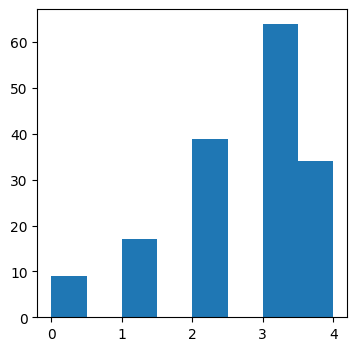

In [256]:
# it is the example below, use to see another community as well.
# Histogram of CRT in community 0
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(crt_0, bins = 8)

## Visualize multiple graph

In [257]:
# Display graphs grouped by the community label
import matplotlib.pyplot as plt

# List of data for each plot
data_0 = [age_0, gender_0, education_0, employment_0, income_0, politics_0, dat_0, crt_0]
data_1 = [age_1, gender_1, education_1, employment_1, income_1, politics_1, dat_1, crt_1]
data_2 = [age_2, gender_2, education_2, employment_2, income_2, politics_2, dat_2, crt_2]

### Community 0



*The number of the community members: 163


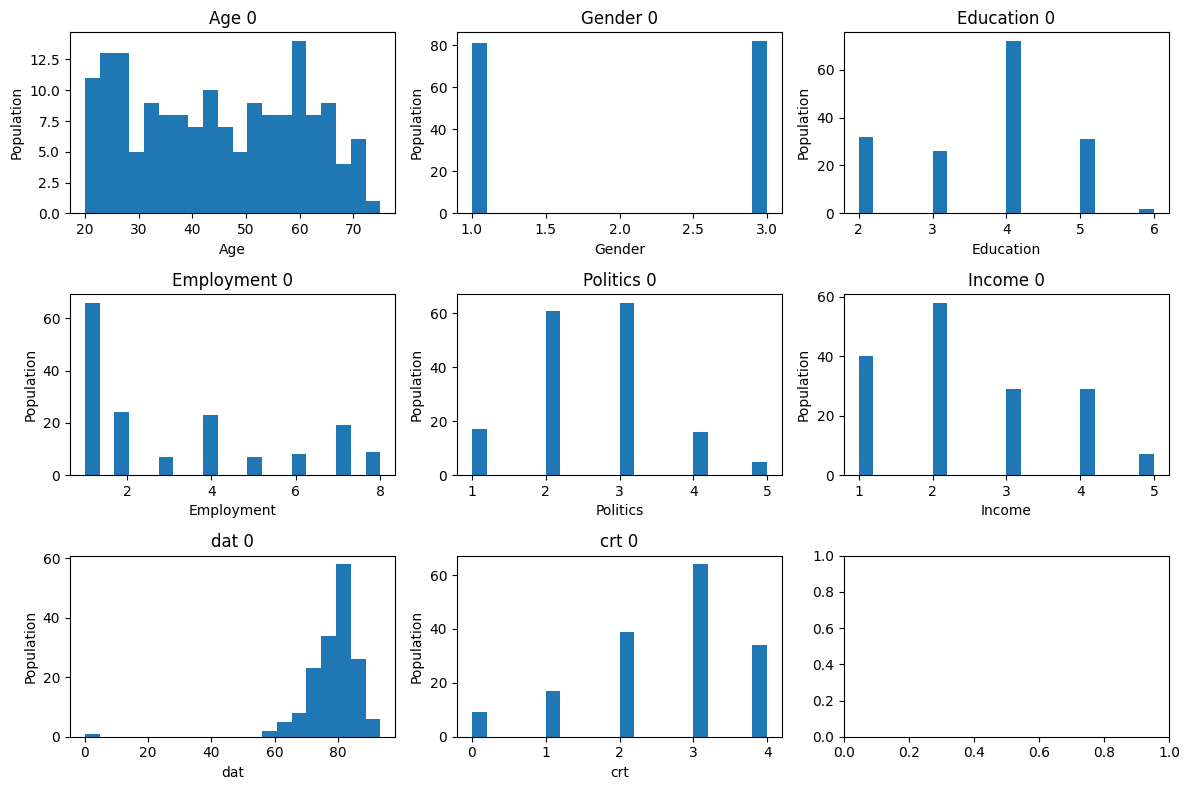

In [258]:
# Create subplots dynamically
fig, axes = plt.subplots(3, 3,  figsize=(12, 8))


# Create a histogram on one of the subplots
axes[0, 0].hist(age_0, bins=20)
axes[0, 0].set_title('Age 0')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[0, 1].hist(gender_0, bins=20)
axes[0, 1].set_title('Gender 0')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[0, 2].hist(education_0, bins=20)
axes[0, 2].set_title('Education 0')
axes[0, 2].set_xlabel('Education')
axes[0, 2].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 0].hist(employment_0, bins=20)
axes[1, 0].set_title('Employment 0')
axes[1, 0].set_xlabel('Employment')
axes[1, 0].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 1].hist(politics_0, bins=20)
axes[1, 1].set_title('Politics 0')
axes[1, 1].set_xlabel('Politics')
axes[1, 1].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 2].hist(income_0, bins=20)
axes[1, 2].set_title('Income 0')
axes[1, 2].set_xlabel('Income')
axes[1, 2].set_ylabel('Population')


# Create a histogram on one of the subplots
axes[2, 0].hist(dat_0, bins=20)
axes[2, 0].set_title('dat 0')
axes[2, 0].set_xlabel('dat')
axes[2, 0].set_ylabel('Population')


# Create a histogram on one of the subplots
axes[2, 1].hist(crt_0, bins=20)
axes[2, 1].set_title('crt 0')
axes[2, 1].set_xlabel('crt')
axes[2, 1].set_ylabel('Population')

# Adjust layout
plt.tight_layout()

# Print the number of the community members:
print("\n\n*The number of the community members:", len(communities[0]))

# Show the combined plots
plt.show()


### community 1



*The number of the community members: 124


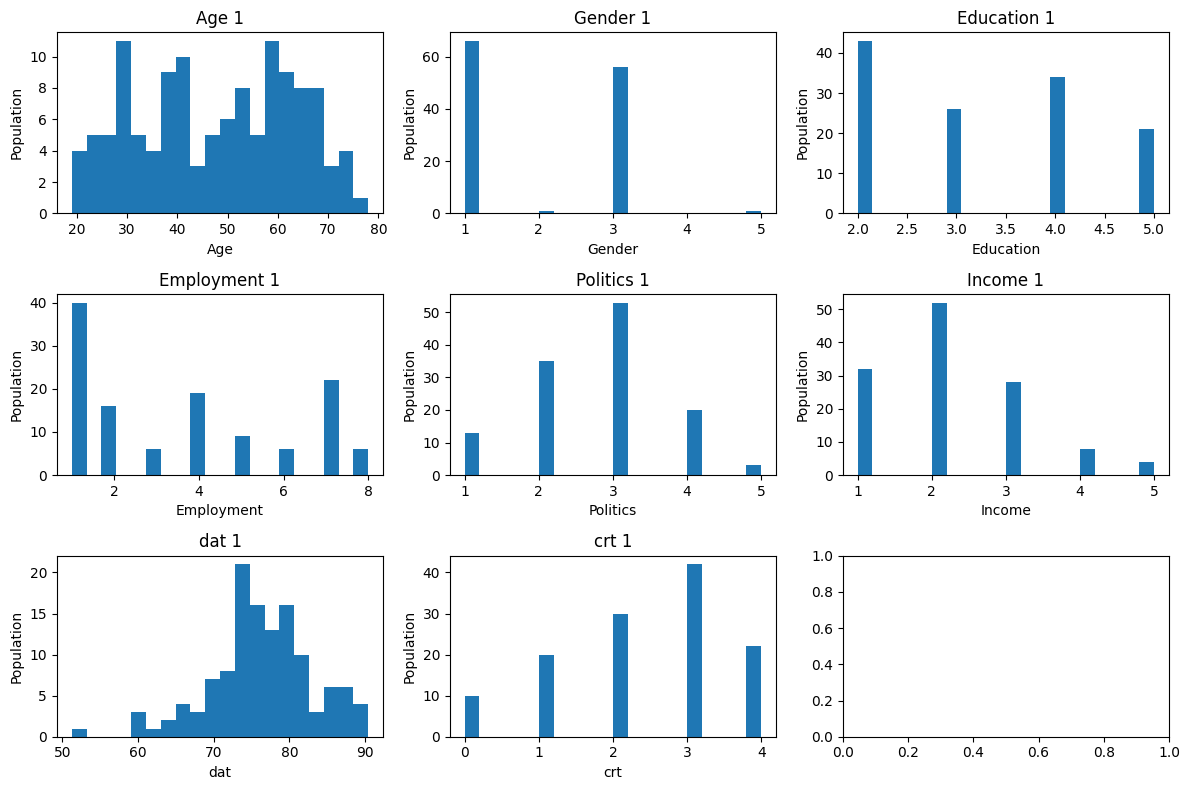

In [259]:
# Create subplots dynamically
fig, axes = plt.subplots(3, 3,  figsize=(12, 8))


# Create a histogram on one of the subplots
axes[0, 0].hist(age_1, bins=20)
axes[0, 0].set_title('Age 1')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[0, 1].hist(gender_1, bins=20)
axes[0, 1].set_title('Gender 1')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[0, 2].hist(education_1, bins=20)
axes[0, 2].set_title('Education 1')
axes[0, 2].set_xlabel('Education')
axes[0, 2].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 0].hist(employment_1, bins=20)
axes[1, 0].set_title('Employment 1')
axes[1, 0].set_xlabel('Employment')
axes[1, 0].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 1].hist(politics_1, bins=20)
axes[1, 1].set_title('Politics 1')
axes[1, 1].set_xlabel('Politics')
axes[1, 1].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 2].hist(income_1, bins=20)
axes[1, 2].set_title('Income 1')
axes[1, 2].set_xlabel('Income')
axes[1, 2].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[2, 0].hist(dat_1, bins=20)
axes[2, 0].set_title('dat 1')
axes[2, 0].set_xlabel('dat')
axes[2, 0].set_ylabel('Population')


# Create a histogram on one of the subplots
axes[2, 1].hist(crt_1, bins=20)
axes[2, 1].set_title('crt 1')
axes[2, 1].set_xlabel('crt')
axes[2, 1].set_ylabel('Population')

# Adjust layout
plt.tight_layout()

# Print the number of the community members:
print("\n\n*The number of the community members:", len(communities[1]))

# Show the combined plots
plt.show()


* dat1: compared to the community 0, it is more evenly distributed. 

### community 2



*The number of the community members: 3


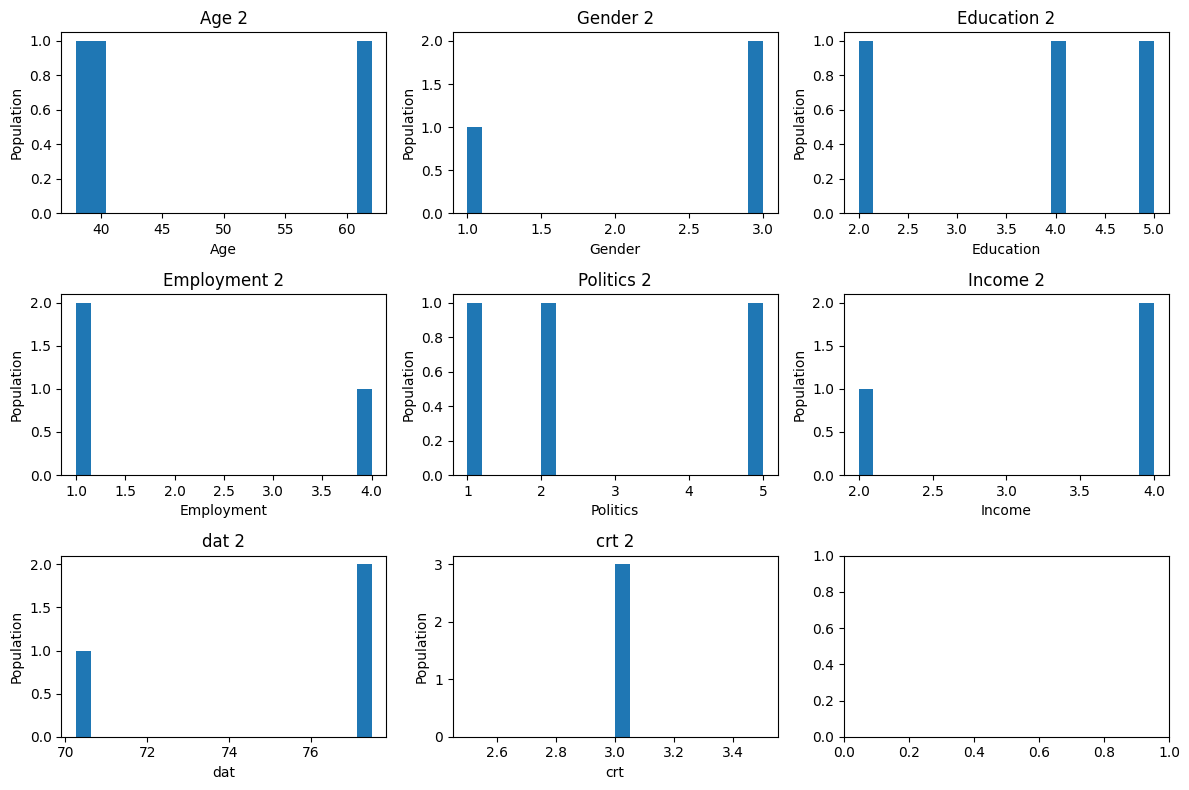

In [260]:
# Create subplots dynamically
fig, axes = plt.subplots(3, 3,  figsize=(12, 8))


# Create a histogram on one of the subplots
axes[0, 0].hist(age_2, bins=20)
axes[0, 0].set_title('Age 2')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[0, 1].hist(gender_2, bins=20)
axes[0, 1].set_title('Gender 2')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[0, 2].hist(education_2, bins=20)
axes[0, 2].set_title('Education 2')
axes[0, 2].set_xlabel('Education')
axes[0, 2].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 0].hist(employment_2, bins=20)
axes[1, 0].set_title('Employment 2')
axes[1, 0].set_xlabel('Employment')
axes[1, 0].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 1].hist(politics_2, bins=20)
axes[1, 1].set_title('Politics 2')
axes[1, 1].set_xlabel('Politics')
axes[1, 1].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 2].hist(income_2, bins=20)
axes[1, 2].set_title('Income 2')
axes[1, 2].set_xlabel('Income')
axes[1, 2].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[2, 0].hist(dat_2, bins=20)
axes[2, 0].set_title('dat 2')
axes[2, 0].set_xlabel('dat')
axes[2, 0].set_ylabel('Population')


# Create a histogram on one of the subplots
axes[2, 1].hist(crt_2, bins=20)
axes[2, 1].set_title('crt 2')
axes[2, 1].set_xlabel('crt')
axes[2, 1].set_ylabel('Population')

# Adjust layout
plt.tight_layout()

# Print the number of the community members:
print("\n\n*The number of the community members:", len(communities[2]))

# Show the combined plots
plt.show()


* **REFsource** : interpreting the clustering results.

https://developers.google.com/machine-learning/clustering/interpret


### ANOVA for the continuous variable
Assumptions: ANOVA assumes homogeneity of variances (similar variances in groups), normal distribution of residuals, and independence of observations.

check if the data are approximately normally distributed within each cluster and if the variances across clusters are roughly equal.

**age**

In [261]:
# print cardinality, mean, var, std within the cluster.
# community_0
print("*community_0 in age")
print("how many:", len(age_0))
print("mean:", np.mean(age_0))
print("variance:", np.var(age_0))
print("std:", np.std(age_0))

# community_1
print("\n*community_1 in age ")
print("how many:", len(age_1))
print("mean:", np.mean(age_1))
print("variance:", np.var(age_1))
print("std:", np.std(age_1))

# community_2
print("\n*community_2 in age ")
print("how many:", len(age_2))
print("mean:", np.mean(age_2))
print("variance:", np.var(age_2))
print("std:", np.std(age_2))

*community_0 in age
how many: 163
mean: 44.42944785276074
variance: 237.4597463209003
std: 15.4097289502736

*community_1 in age 
how many: 124
mean: 47.814516129032256
variance: 245.00591831425595
std: 15.65266489497095

*community_2 in age 
how many: 3
mean: 46.666666666666664
variance: 118.22222222222221
std: 10.873004286866726


* ANOVA requires homogeneous variance -> Levene's test for the verification.

**DAT**

In [262]:
# print cardinality, mean, var, std within the cluster.
# community_0
print("*community_0 in dat")
print("how many:", len(dat_0))
print("mean:", np.mean(dat_0))
print("variance:", np.var(dat_0))
print("std:", np.std(dat_0))

# community_1
print("\n*community_1 in dat ")
print("how many:", len(dat_1))
print("mean:", np.mean(dat_1))
print("variance:", np.var(dat_1))
print("std:", np.std(dat_1))

# community_2
print("\n*community_2 in dat ")
print("how many:", len(dat_2))
print("mean:", np.mean(dat_2))
print("variance:", np.var(dat_2))
print("std:", np.std(dat_2))

*community_0 in dat
how many: 163
mean: 78.66478283989359
variance: 81.59927185274363
std: 9.03323152879099

*community_1 in dat 
how many: 124
mean: 76.20981692704395
variance: 46.95308851339103
std: 6.852232374444918

*community_2 in dat 
how many: 3
mean: 74.99746541004806
variance: 11.2399288147201
std: 3.352600306436796


**CRT**

In [263]:
# print cardinality, mean, var, std within the cluster.
# community_0
print("*community_0 in crt")
print("how many:", len(crt_0))
print("mean:", np.mean(crt_0))
print("variance:", np.var(crt_0))
print("std:", np.std(crt_0))

# community_1
print("\n*community_1 in crt ")
print("how many:", len(crt_1))
print("mean:", np.mean(crt_1))
print("variance:", np.var(crt_1))
print("std:", np.std(crt_1))

# community_2
print("\n*community_2 in crt ")
print("how many:", len(crt_2))
print("mean:", np.mean(crt_2))
print("variance:", np.var(crt_2))
print("std:", np.std(crt_2))

*community_0 in crt
how many: 163
mean: 2.5950920245398774
variance: 1.1980127215928338
std: 1.0945376748165565

*community_1 in crt 
how many: 124
mean: 2.370967741935484
variance: 1.3946409989594173
std: 1.1809491940635792

*community_2 in crt 
how many: 3
mean: 3.0
variance: 0.0
std: 0.0


### Levene's test

In [264]:
import scipy.stats as stats

In [265]:
# Age

# Assuming you have your data in separate groups
age_0
age_1
age_2

# Perform Levene's test
statistic, p_value = stats.levene(age_0, age_1, age_2)

# Print the results
print("Levene's Test Statistic:", statistic)
print("P-value:", p_value)

# Check the p-value against the significance level (commonly 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis. There is evidence of unequal variances.")
else:
    print("Fail to reject the null hypothesis. Variances are likely homogeneous.")


Levene's Test Statistic: 0.8430103974959482
P-value: 0.4314757959800969
Fail to reject the null hypothesis. Variances are likely homogeneous.


In [266]:
# dat

# Assuming you have your data in separate groups
dat_0
dat_1
dat_2

# Perform Levene's test
statistic, p_value = stats.levene(dat_0, dat_1, dat_2)

# Print the results
print("Levene's Test Statistic:", statistic)
print("P-value:", p_value)

# Check the p-value against the significance level (commonly 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis. There is evidence of unequal variances.")
else:
    print("Fail to reject the null hypothesis. Variances are likely homogeneous.")


Levene's Test Statistic: 0.4382176813657008
P-value: 0.6456162900754453
Fail to reject the null hypothesis. Variances are likely homogeneous.


In [267]:
# crt

# Assuming you have your data in separate groups
crt_0
crt_1
crt_2

# Perform Levene's test
statistic, p_value = stats.levene(crt_0, crt_1, crt_2)

# Print the results
print("Levene's Test Statistic:", statistic)
print("P-value:", p_value)

# Check the p-value against the significance level (commonly 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis. There is evidence of unequal variances.")
else:
    print("Fail to reject the null hypothesis. Variances are likely homogeneous.")


Levene's Test Statistic: 2.822613074532975
P-value: 0.0611019361544074
Fail to reject the null hypothesis. Variances are likely homogeneous.


In [268]:
# It is suitable for the ANOVA

In [269]:
from scipy.stats import f_oneway

# Confidence level has been set initially 0.95, therefore p < 0.05 is able to reject the null hypothesis. 
# null-hypothesis: the groups do not have significantly different means

In [270]:
# Age
# Group the data by cluster label and extract the continuous feature
grouped_data = [age_0, age_1, age_2]

# Perform ANOVA
f_statistic, p_value = f_oneway(*grouped_data)

# Print the p-value
print("ANOVA test p-value:", p_value)


ANOVA test p-value: 0.1898273213456205


p is not below 0.05 -> fail reject the null-hypothesis

In [271]:
# dat
# Group the data by cluster label and extract the continuous feature
grouped_data = [dat_0, dat_1, dat_2]

# Perform ANOVA
f_statistic, p_value = f_oneway(*grouped_data)

# Print the p-value
print("ANOVA test p-value:", p_value)


ANOVA test p-value: 0.03716080104242446


p is below 0.05 -> reject the null-hypothesis, there is an evidence of unequal variances.

In [272]:
# crt
# Group the data by cluster label and extract the continuous feature
grouped_data = [crt_0, crt_1, crt_2]

# Perform ANOVA
f_statistic, p_value = f_oneway(*grouped_data)

# Print the p-value
print("ANOVA test p-value:", p_value)


ANOVA test p-value: 0.19007953719435006


p is not below 0.05 -> fail to reject the null-hypothesis

**Result:**
There's no significant difference in the means of the continuous feature across different clusters, except for the DAT

### Chi-square test for categorical variable
- one variable: feature, the other one: label

In [273]:
# Create a dataframe with participants id and their community label
label_0 = pd.DataFrame(data= [0 for i in range(len(communities[0]))], index = list(communities[0]))
label_1 = pd.DataFrame(data= [1 for i in range(len(communities[1]))], index = list(communities[1]))
label_2 = pd.DataFrame(data= [2 for i in range(len(communities[2]))], index = list(communities[2]))

In [274]:
print(len(label_0), len(label_1), len(label_2))

163 124 3


In [275]:
label_0 = label_0.reset_index()
label_1 = label_1.reset_index()
label_2 = label_2.reset_index()

In [276]:
print(len(label_0), len(label_1), len(label_2))

163 124 3


In [277]:
# check if the above cell is coherent with the result of this cell.
print(len(communities[0]), len(communities[1]), len(communities[2]))

163 124 3


In [278]:
labels = pd.concat([label_0, label_1, label_2], axis = 0, ignore_index = True)
labels = labels.rename(columns = { 0 : 'label'})

**calculate expected frequencies**

In [279]:
# Sort the column 'index' into alphabetical order
labels = labels.sort_values(by='index')
labels = labels.reset_index()
labels = labels[['index', 'label']]

In [280]:
# Sort the dataframe into alphabetical order
gender = gender.reset_index()
gender = gender.sort_values(by = 'PARTICIPANT_ID')

politics = politics.reset_index()
politics = politics.sort_values(by = 'PARTICIPANT_ID')

education = education.reset_index()
education = education.sort_values(by = 'PARTICIPANT_ID')

employment = employment.reset_index()
employment = employment.sort_values(by = 'PARTICIPANT_ID')

income = income.reset_index()
income = income.sort_values(by = 'PARTICIPANT_ID')

In [281]:
# Only selects the participants that also remains in the labels' participant_id info.
gender = gender[gender['PARTICIPANT_ID'].isin(labels['index'])].reset_index()
gender = gender[['PARTICIPANT_ID', 'GENDER']]

politics = politics[politics['PARTICIPANT_ID'].isin(labels['index'])].reset_index()
politics = politics[['PARTICIPANT_ID', 'POLITICAL']]

education = education[education['PARTICIPANT_ID'].isin(labels['index'])].reset_index()
education = education[['PARTICIPANT_ID', 'EDUCATION']]

employment = employment[employment['PARTICIPANT_ID'].isin(labels['index'])].reset_index()
employment = employment[['PARTICIPANT_ID', 'EMPLOYMENT']]

income = income[income['PARTICIPANT_ID'].isin(labels['index'])].reset_index()
income = income[['PARTICIPANT_ID', 'INCOME']]

In [282]:
# check if the order of the particpant column is identical to the label column - gender
cnt = 0
for i in range(len(labels)): 
    if gender['PARTICIPANT_ID'].loc[i] == labels['index'].loc[i]: 
        pass
    else:
        cnt += 1
print("gender - not identical:", cnt)

gender - not identical: 0


In [283]:
# check if the order of the particpant column is identical to the label column - politics
cnt = 0
for i in range(len(labels)): 
    if politics['PARTICIPANT_ID'].loc[i] == labels['index'].loc[i]: 
        pass
    else:
        cnt += 1
print("politics - not identical:", cnt)

politics - not identical: 0


In [284]:
# check if the order of the particpant column is identical to the label column - education
cnt = 0
for i in range(len(labels)): 
    if education['PARTICIPANT_ID'].loc[i] == labels['index'].loc[i]: 
        pass
    else:
        cnt += 1
print("education - not identical:", cnt)

education - not identical: 0


In [285]:
# check if the order of the particpant column is identical to the label column - employment
cnt = 0
for i in range(len(labels)): 
    if employment['PARTICIPANT_ID'].loc[i] == labels['index'].loc[i]: 
        pass
    else:
        cnt += 1
print("employment - not identical:", cnt)

employment - not identical: 0


In [286]:
# check if the order of the particpant column is identical to the label column - income
cnt = 0
for i in range(len(labels)): 
    if income['PARTICIPANT_ID'].loc[i] == labels['index'].loc[i]: 
        pass
    else:
        cnt += 1
print("income - not identical:", cnt)

income - not identical: 0


In [287]:
from scipy.stats import chi2_contingency

In [288]:
# Create a contingency table
contingency_table = pd.crosstab(gender['GENDER'], labels['index'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print("gender, Chi-squared test p-value:", p)


gender, Chi-squared test p-value: 0.4649514910635944


p is not below 0.05 -> fail to reject the null-hypothesis

**Result:**
The distribution of the feature(gender) is **not** significantly different across different clusters.

In [289]:
# Create a contingency table
contingency_table = pd.crosstab(politics['POLITICAL'], labels['index'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print("politics, Chi-squared test p-value:", p)

politics, Chi-squared test p-value: 0.4613811849970913


p is not below 0.05 -> fail to reject the null-hypothesis

**Result:**
The distribution of the feature(politics) is **not** significantly different across different clusters.

In [290]:
# Create a contingency table
contingency_table = pd.crosstab(education['EDUCATION'], labels['index'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print("education, Chi-squared test p-value:", p)

education, Chi-squared test p-value: 0.4613811849970913


p is not below 0.05 -> fail to reject the null-hypothesis

**Result:**
The distribution of the feature(education) is **not** significantly different across different clusters.

In [291]:
# Create a contingency table
contingency_table = pd.crosstab(employment['EMPLOYMENT'], labels['index'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print("employment, Chi-squared test p-value:", p)

employment, Chi-squared test p-value: 0.45208309202539193


p is not below 0.05 -> fail to reject the null-hypothesis

**Result:**
The distribution of the feature(employment) is **not** significantly different across different clusters..

In [292]:
# Create a contingency table
contingency_table = pd.crosstab(income['INCOME'], labels['index'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print("income, Chi-squared test p-value:", p)

income, Chi-squared test p-value: 0.4613811849970913


p is not below 0.05 -> fail to reject the null-hypothesis

**Result:**
The distribution of the feature(employment) is **not** significantly different across different clusters..

### Analysis of the ANOVA and Chi-Square test results

1. ANOVA

     1) Table of metrics - mean, var, std, cardinality, p-value:
        https://docs.google.com/spreadsheets/d/1E4k_kSAiAspQuXAbEuYquVKFuzHa5Ihz7mNryUj1jOU/edit#gid=446196028 -> update

     2) Except for the DAT, Continuous features doesn't show the significant difference across the clusters. 

2. Chi-Square

: There was no significant difference across the clusters with the distribution of the categorical features.